## Introduction
#### Predict the genre of the songs from tunable audio track features like energy, tempo, key, mode, and valence, and others.

### Import the necessary packages.

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # visualization
from matplotlib import pyplot as plt # visualization
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from wordcloud import WordCloud, STOPWORDS # visualization
stopwords=set(STOPWORDS)
import nltk

In [1]:
from google.colab import
 drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


### Import train and test dataset

In [4]:
train=pd.read_csv("/content/gdrive/MyDrive/music_genre_classification_weekend_hackathon_edition_2_the_last_hacker_standing/train.csv")
test=pd.read_csv("/content/gdrive/MyDrive/music_genre_classification_weekend_hackathon_edition_2_the_last_hacker_standing/test.csv")

### Structure of the train and test dataset.

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17996 entries, 0 to 17995
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Artist Name         17996 non-null  object 
 1   Track Name          17996 non-null  object 
 2   Popularity          17568 non-null  float64
 3   danceability        17996 non-null  float64
 4   energy              17996 non-null  float64
 5   key                 15982 non-null  float64
 6   loudness            17996 non-null  float64
 7   mode                17996 non-null  int64  
 8   speechiness         17996 non-null  float64
 9   acousticness        17996 non-null  float64
 10  instrumentalness    13619 non-null  float64
 11  liveness            17996 non-null  float64
 12  valence             17996 non-null  float64
 13  tempo               17996 non-null  float64
 14  duration_in min/ms  17996 non-null  float64
 15  time_signature      17996 non-null  int64  
 16  Clas

#### The above information shows that there are 17996 data entries and 17 columns.

#### The target column is **Class**.

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7713 entries, 0 to 7712
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Artist Name         7713 non-null   object 
 1   Track Name          7713 non-null   object 
 2   Popularity          7486 non-null   float64
 3   danceability        7713 non-null   float64
 4   energy              7713 non-null   float64
 5   key                 6905 non-null   float64
 6   loudness            7713 non-null   float64
 7   mode                7713 non-null   int64  
 8   speechiness         7713 non-null   float64
 9   acousticness        7713 non-null   float64
 10  instrumentalness    5804 non-null   float64
 11  liveness            7713 non-null   float64
 12  valence             7713 non-null   float64
 13  tempo               7713 non-null   float64
 14  duration_in min/ms  7713 non-null   float64
 15  time_signature      7713 non-null   int64  
dtypes: flo

#### The above information shows that there are 7713 data entries and 16 columns.

#### Let's see is there any missing values in train and test dataset by column wise.

In [ ]:
train.isnull().sum()

Artist Name              0
Track Name               0
Popularity             428
danceability             0
energy                   0
key                   2014
loudness                 0
mode                     0
speechiness              0
acousticness             0
instrumentalness      4377
liveness                 0
valence                  0
tempo                    0
duration_in min/ms       0
time_signature           0
Class                    0
dtype: int64

#### The above information shows that in train dataset the Popularity, key and instrumentalness column has more missing values.

In [ ]:
test.isnull().sum()

Artist Name              0
Track Name               0
Popularity             227
danceability             0
energy                   0
key                    808
loudness                 0
mode                     0
speechiness              0
acousticness             0
instrumentalness      1909
liveness                 0
valence                  0
tempo                    0
duration_in min/ms       0
time_signature           0
dtype: int64

### The above information shows that in test dataset the Popularity, key and instrumentalness column has more missing values.

#### Let's see the glimpse of train dataset

In [ ]:
train.head()

,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
0,Bruno Mars,That's What I Like (feat. Gucci Mane),60.0,0.854,0.564,1.0,-4.964,1,0.0485,0.017100,NaN,0.0849,0.8990,134.071,234596.0,4,5
1,Boston,Hitch a Ride,54.0,0.382,0.814,3.0,-7.230,1,0.0406,0.001100,0.004010,0.1010,0.5690,116.454,251733.0,4,10
2,The Raincoats,No Side to Fall In,35.0,0.434,0.614,6.0,-8.334,1,0.0525,0.486000,0.000196,0.3940,0.7870,147.681,109667.0,4,6
3,Deno,Lingo (feat. J.I & Chunkz),66.0,0.853,0.597,10.0,-6.528,0,0.0555,0.021200,NaN,0.1220,0.5690,107.033,173968.0,4,5
4,Red Hot Chili Peppers,Nobody Weird Like Me - Remastered,53.0,0.167,0.975,2.0,-4.279,1,0.2160,0.000169,0.016100,0.1720,0.0918,199.060,229960.0,4,10


In [ ]:
train[train['Class']=='Bollywood_3']

### Let's explore and visualize each column of train dataset.First,let's see the target column(**Class**) distribution.

#### For better visualization class level are recorded by using the submission file column header.

In [7]:
submisssion=pd.read_csv("/content/gdrive/MyDrive/music_genre_classification_weekend_hackathon_edition_2_the_last_hacker_standing/submission.csv")

In [8]:
class_name=submisssion.columns.tolist()
class_map={count:cl for count,cl in enumerate(class_name,0)}
train['Class']=train['Class'].map(class_map)

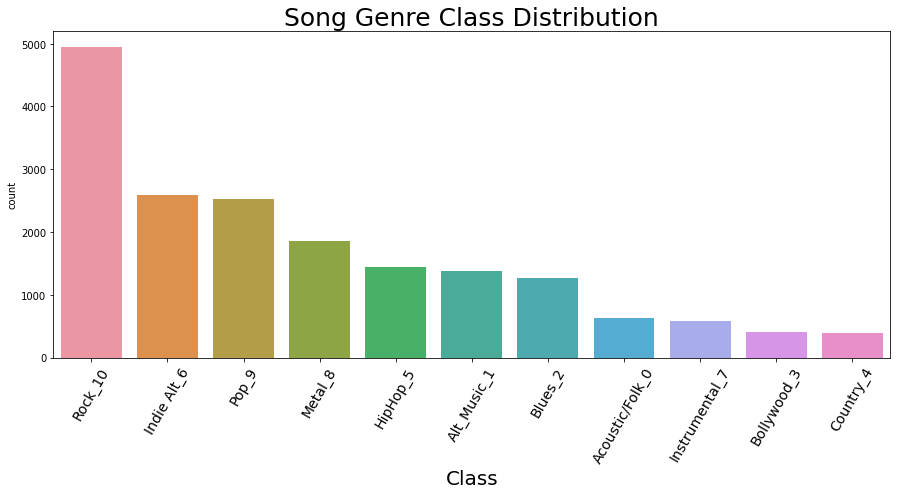

In [ ]:
plt.figure(figsize=(15,6))
_=sns.countplot(train['Class'],order=train['Class'].value_counts().index)
_=plt.title("Song Genre Class Distribution",fontsize=25)
_=plt.xlabel('Class',fontsize=20)
_=plt.xticks(fontsize=14, rotation=60)

In [ ]:
train.groupby(['Class'])['Class'].agg({'count'}).reset_index().sort_values('count',ascending=False)

,Class,count
10,Rock_10,4949
6,Indie Alt_6,2587
9,Pop_9,2524
8,Metal_8,1854
5,HipHop_5,1447
1,Alt_Music_1,1373
2,Blues_2,1272
0,Acoustic/Folk_0,625
7,Instrumental_7,576
3,Bollywood_3,402


#### The above bar chart eaxplains that the target feature biased to **Rock_10**.

#### The target class is highly imbalanced.

### Let's see which artist's song is mostly in the dataset.

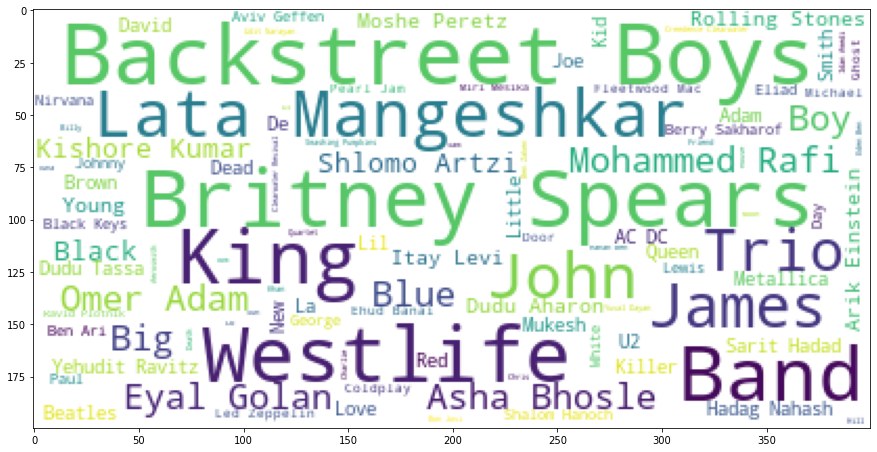

In [ ]:
_=plt.figure(figsize=(15, 14))
wc=WordCloud(background_color="white", max_words=100, stopwords=stopwords,
                   max_font_size=40, random_state=42).generate(train['Artist Name'].to_string())  
    
_=plt.imshow(wc)    

In [ ]:
len(train['Artist Name'].value_counts())

9149

In [ ]:
train['Artist Name'].value_counts().nlargest(20)

Backstreet Boys       69
Westlife              60
Britney Spears        54
Eyal Golan            48
Omer Adam             48
Shlomo Artzi          39
The Rolling Stones    38
Itay Levi             35
Arik Einstein         35
Moshe Peretz          34
Dudu Aharon           34
Hadag Nahash          33
Yehudit Ravitz        31
U2                    30
Lata Mangeshkar       28
AC/DC                 27
Metallica             27
Dudu Tassa            26
Sarit Hadad           26
The Beatles           25
Name: Artist Name, dtype: int64

#### There is 9149 artists' song information available in the dataset.

#### Wordcloud shows which artist song is mostly in the dataset.

#### In the dataset more than 50 songs are from the artists **Backstreet Boys, Westlife, Britney Spears**.

### Let's see which word is mostly used in the track name. 

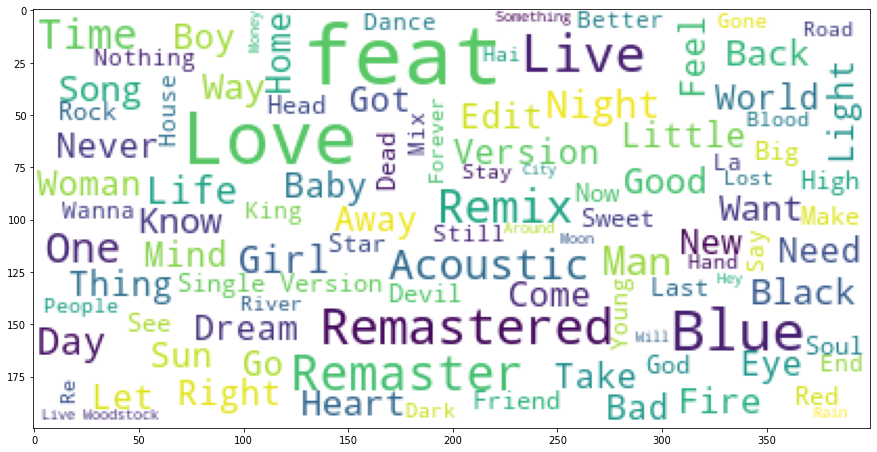

In [ ]:
_=plt.figure(figsize=(15, 14))
wc=WordCloud(background_color="white", max_words=100, stopwords=stopwords,
                   max_font_size=40, random_state=42).generate(train['Track Name'].to_string())  
    
_=plt.imshow(wc)    

### Let's see song's popularity score distribution.

#### Let's create a function for histogram plot.

In [5]:
def hist_plot(df,col,title=''):
    _=plt.figure(figsize=(10,8))
    _=sns.histplot(df[col], kde=True,)
    _=plt.title(title,fontsize=25)
    _=plt.xlabel(col,fontsize=20)
    _=plt.xticks(fontsize=19)

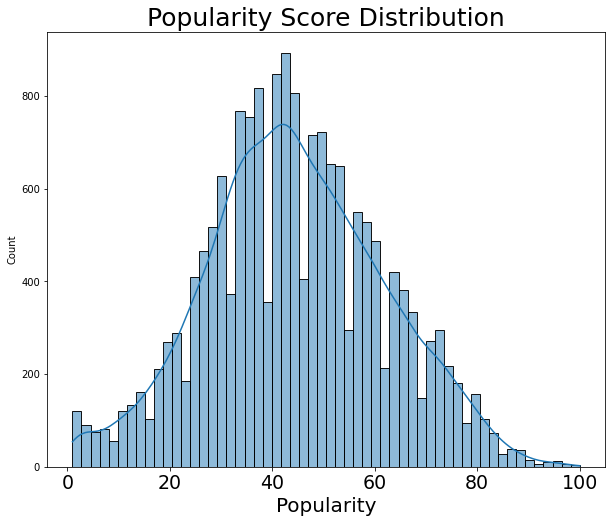

In [6]:
hist_plot(train,'Popularity',title="Popularity Score Distribution")

#### Let's create a function for boxplot.

In [9]:
def box_plot(df,col,title=''):
    _=plt.figure(figsize=(10,8))
    _=sns.boxplot(y=df[col])
    _=plt.title(title,fontsize=25)
    _=plt.ylabel(col,fontsize=20)
    _=plt.yticks(fontsize=14)

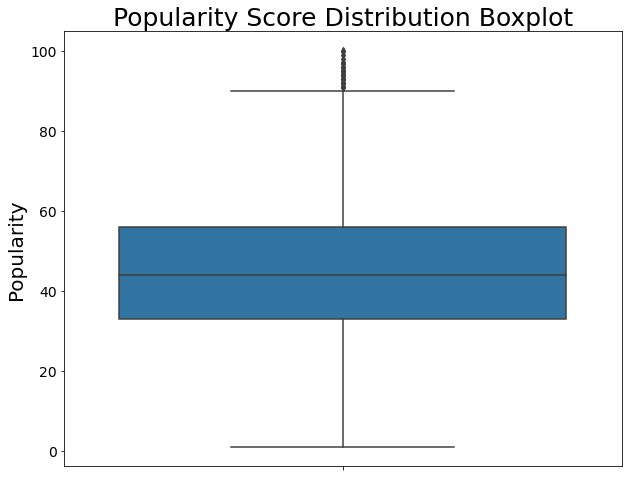

In [10]:
box_plot(train,'Popularity',"Popularity Score Distribution Boxplot")

In [ ]:
train['Popularity'].isnull().sum()

428

In [ ]:
train['Popularity'].describe()

count    17568.000000
mean        44.512124
std         17.426928
min          1.000000
25%         33.000000
50%         44.000000
75%         56.000000
max        100.000000
Name: Popularity, dtype: float64

#### The above histogram explains that the popularity score is normally distributed.

#### There are 428 missing values in the popularity column.

#### The popularity score ranges from 1 to 100.

#### The average popularity score is 44.5.

#### The boxplot explains that there are outliers above the third quartile.


### Let's see song genre wise popularity score distribution.

#### Let's create a function for genre-wise boxplot.

In [11]:
def genre_wise_box(df,groupcol,value):
    _=plt.figure(figsize=(20,10))
    _=sns.boxplot(x=df[groupcol],y=df[value])
    _=plt.xlabel(groupcol,fontsize=20)
    _=plt.ylabel(value,fontsize=20)
    _=plt.xticks(fontsize=18, rotation=60)

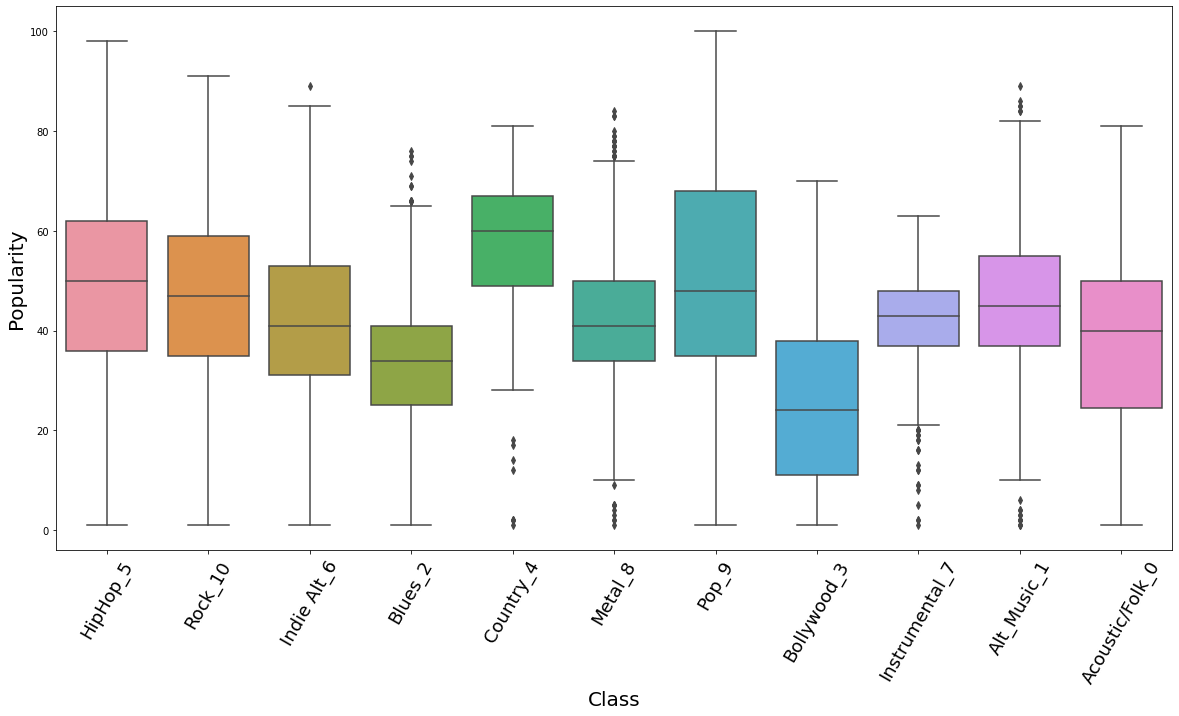

In [12]:
genre_wise_box(train,'Class','Popularity')

#### Let's create a function for group summary.

In [13]:
def group_summary(df,groupcol,value):
    return df.groupby(groupcol)[value].describe().reset_index().sort_values('mean',ascending=False)

In [ ]:
group_summary(train,'Class','Popularity')

,Class,count,mean,std,min,25%,50%,75%,max
4,Country_4,367.0,57.294278,13.290801,1.0,49.0,60.0,67.0,81.0
9,Pop_9,2461.0,50.355953,21.019660,1.0,35.0,48.0,68.0,100.0
5,HipHop_5,1425.0,48.638596,18.872742,1.0,36.0,50.0,62.0,98.0
10,Rock_10,4862.0,46.967914,16.607569,1.0,35.0,47.0,59.0,91.0
1,Alt_Music_1,1344.0,45.883185,14.174339,1.0,37.0,45.0,55.0,89.0
8,Metal_8,1822.0,42.226674,13.122985,1.0,34.0,41.0,50.0,84.0
7,Instrumental_7,547.0,41.506399,10.426854,1.0,37.0,43.0,48.0,63.0
6,Indie Alt_6,2544.0,41.474843,15.955630,1.0,31.0,41.0,53.0,89.0
0,Acoustic/Folk_0,551.0,38.105263,16.901742,1.0,24.5,40.0,50.0,81.0
2,Blues_2,1257.0,32.911695,12.949903,1.0,25.0,34.0,41.0,76.0


#### The above boxplot explains that country, pop, and hip-hop genres song's average popularity score is higher than the rest of the genre.

#### Bollywood genre songs are the lowest in the average popularity score.

#### Indie_Alt, Blues, genre song's popularity scores have outliers above the third quartile.

#### Country, Instrumental, genre song's popularity scores have outliers below the first quartile.

#### Metal, Alt_Music, genre song's popularity scores have outliers in below the first quartile and above the third quartile.

### Let's see danceability scale distribution.danceability describes how suitable a song is for dancing.

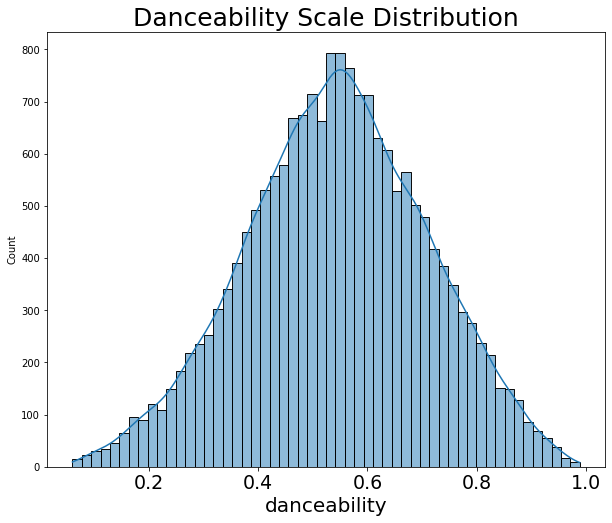

In [ ]:
hist_plot(train,'danceability',title='Danceability Scale Distribution')

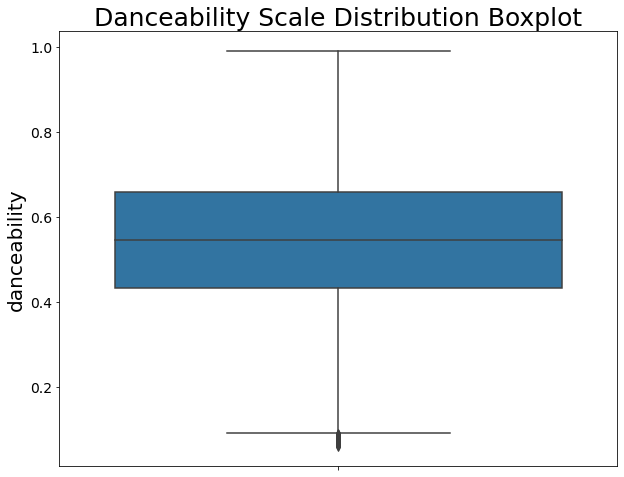

In [ ]:
box_plot(train,'danceability',title='Danceability Scale Distribution Boxplot')

In [ ]:
train['danceability'].describe()

count    17996.000000
mean         0.543433
std          0.166268
min          0.059600
25%          0.432000
50%          0.545000
75%          0.659000
max          0.989000
Name: danceability, dtype: float64

#### The above histogram explains that the danceability scale is normally distributed.

#### danceability range from 0 (low danceability) to 1 (high danceability).

#### The average danceability of songs in the dataset is 0.54.

#### The above histogram explains that there are outliers below the first quartile.

### Let's see song genre-wise danceability scale distribution.

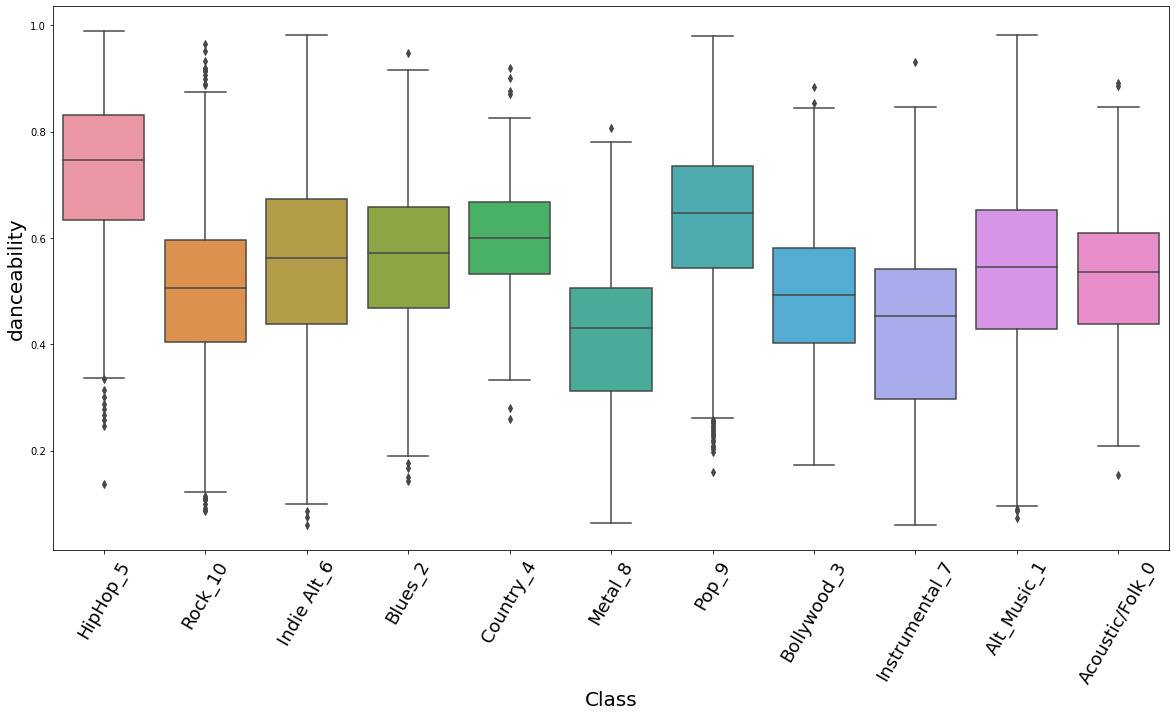

In [ ]:
genre_wise_box(train,'Class','danceability')

In [ ]:
group_summary(train,'Class','danceability')

,Class,count,mean,std,min,25%,50%,75%,max
5,HipHop_5,1447.0,0.725989,0.138247,0.1380,0.634,0.7460,0.83200,0.989
9,Pop_9,2524.0,0.634707,0.143411,0.1590,0.544,0.6460,0.73525,0.980
4,Country_4,387.0,0.595506,0.107115,0.2590,0.532,0.6000,0.66750,0.920
2,Blues_2,1272.0,0.561220,0.139854,0.1430,0.469,0.5720,0.65900,0.947
6,Indie Alt_6,2587.0,0.552541,0.164439,0.0599,0.438,0.5620,0.67250,0.982
1,Alt_Music_1,1373.0,0.536833,0.160227,0.0731,0.429,0.5450,0.65200,0.982
0,Acoustic/Folk_0,625.0,0.525798,0.126761,0.1550,0.438,0.5350,0.60900,0.891
10,Rock_10,4949.0,0.500831,0.139419,0.0862,0.405,0.5060,0.59600,0.964
3,Bollywood_3,402.0,0.498281,0.128639,0.1730,0.402,0.4930,0.58050,0.884
7,Instrumental_7,576.0,0.425584,0.173923,0.0596,0.297,0.4535,0.54125,0.930


#### Hip-hop and Pop songs have high danceability scale value.

#### The above boxplot explains that there is a difference between genre and danceability scale.

#### There are outliers in all genre classes.


### Let's see songs' energy scale distribution. energy describes how a song is fast, loud, and noisy.

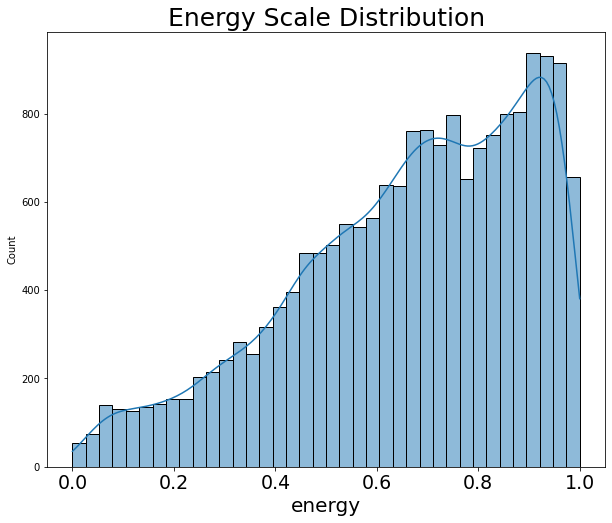

In [ ]:
hist_plot(train,'energy',"Energy Scale Distribution")

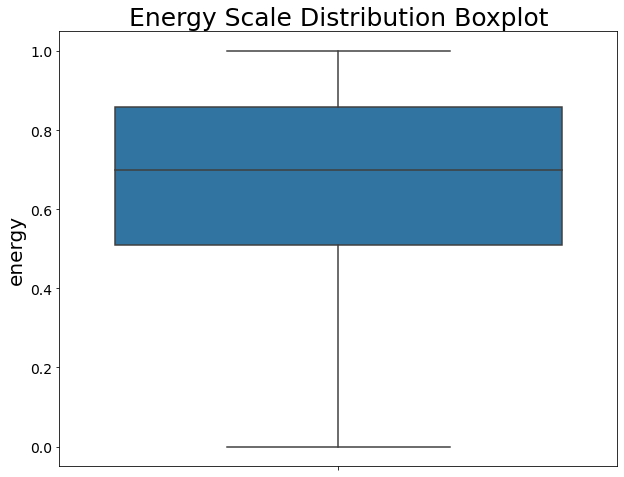

In [ ]:
box_plot(train,'energy',"Energy Scale Distribution Boxplot")

In [ ]:
train['energy'].describe()

count    17996.000000
mean         0.662777
std          0.235373
min          0.000020
25%          0.509000
50%          0.700000
75%          0.860000
max          1.000000
Name: energy, dtype: float64

#### The above histogram explains that the sun's energy scale distribution is left-skewed.

#### The average energy scale value is 0.67.

#### The box plot shows that there are no outliers. 

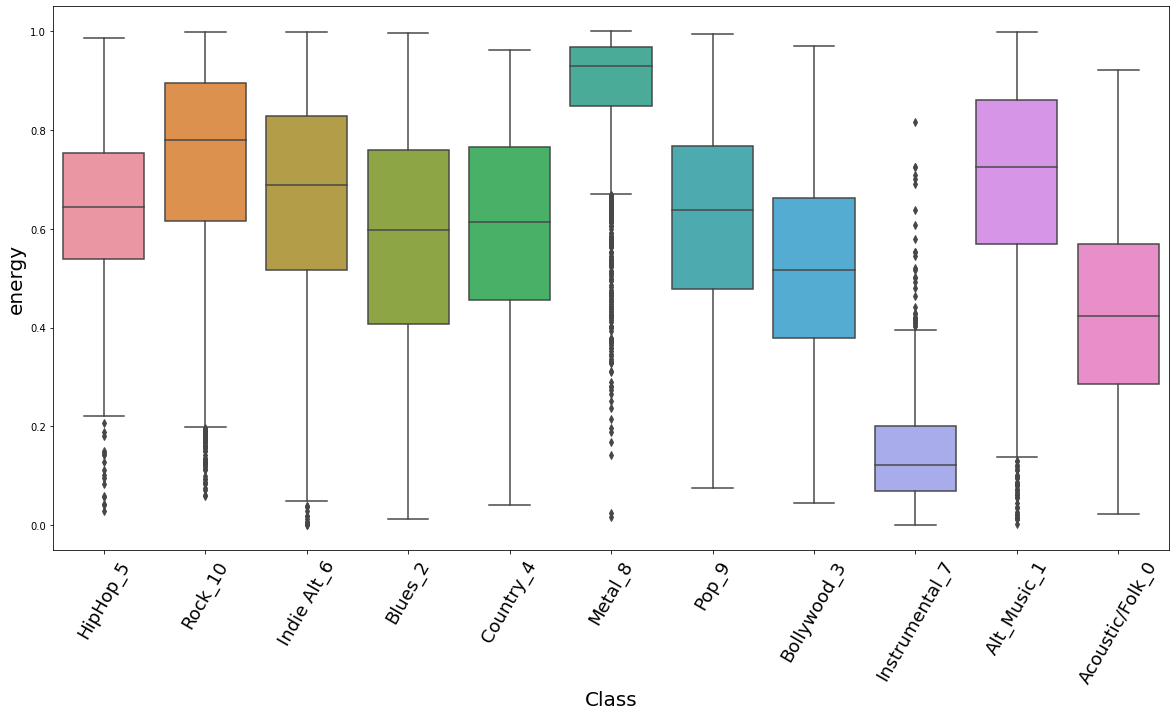

In [ ]:
genre_wise_box(train,'Class','energy')

In [ ]:
group_summary(train,'Class','energy')

,Class,count,mean,std,min,25%,50%,75%,max
8,Metal_8,1854.0,0.875775,0.144926,0.01670,0.849000,0.9290,0.96800,1.000
10,Rock_10,4949.0,0.734751,0.196748,0.05960,0.616000,0.7790,0.89500,0.999
1,Alt_Music_1,1373.0,0.688304,0.213866,0.00301,0.569000,0.7250,0.86000,0.998
6,Indie Alt_6,2587.0,0.653723,0.219484,0.00002,0.516000,0.6890,0.82850,0.998
5,HipHop_5,1447.0,0.642619,0.158601,0.02920,0.539000,0.6440,0.75300,0.985
9,Pop_9,2524.0,0.619265,0.194920,0.07460,0.479000,0.6380,0.76800,0.995
4,Country_4,387.0,0.600072,0.199968,0.04000,0.456000,0.6140,0.76450,0.961
2,Blues_2,1272.0,0.577879,0.232583,0.01320,0.406500,0.5970,0.76025,0.997
3,Bollywood_3,402.0,0.521456,0.188689,0.04400,0.378250,0.5165,0.66200,0.969
0,Acoustic/Folk_0,625.0,0.435147,0.194261,0.02280,0.285000,0.4230,0.57000,0.922


#### Metal and Rock genre songs have the highest average energy scale value.

#### Instrumental genre songs have the lowest average energy scale value.

#### Boxplot explains that there are outliers in each genre class.

### Let's explore key feature.In music key used to represent the integer notation of the pitch class.

### The pitch class integer notation range from 0 to 11.

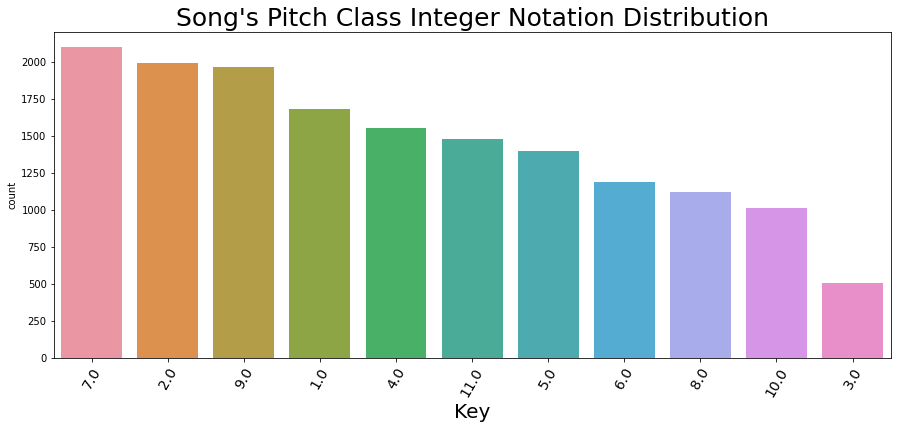

In [ ]:
plt.figure(figsize=(15,6))
_=sns.countplot(train['key'],order=train['key'].value_counts().index)
_=plt.title("Song's Pitch Class Integer Notation Distribution",fontsize=25)
_=plt.xlabel('Key',fontsize=20)
_=plt.xticks(fontsize=14, rotation=60)

#### The above bar chart explains most tracks used pitch class 7.

### Let's see genre-wise pitch class integer notaion distribution.

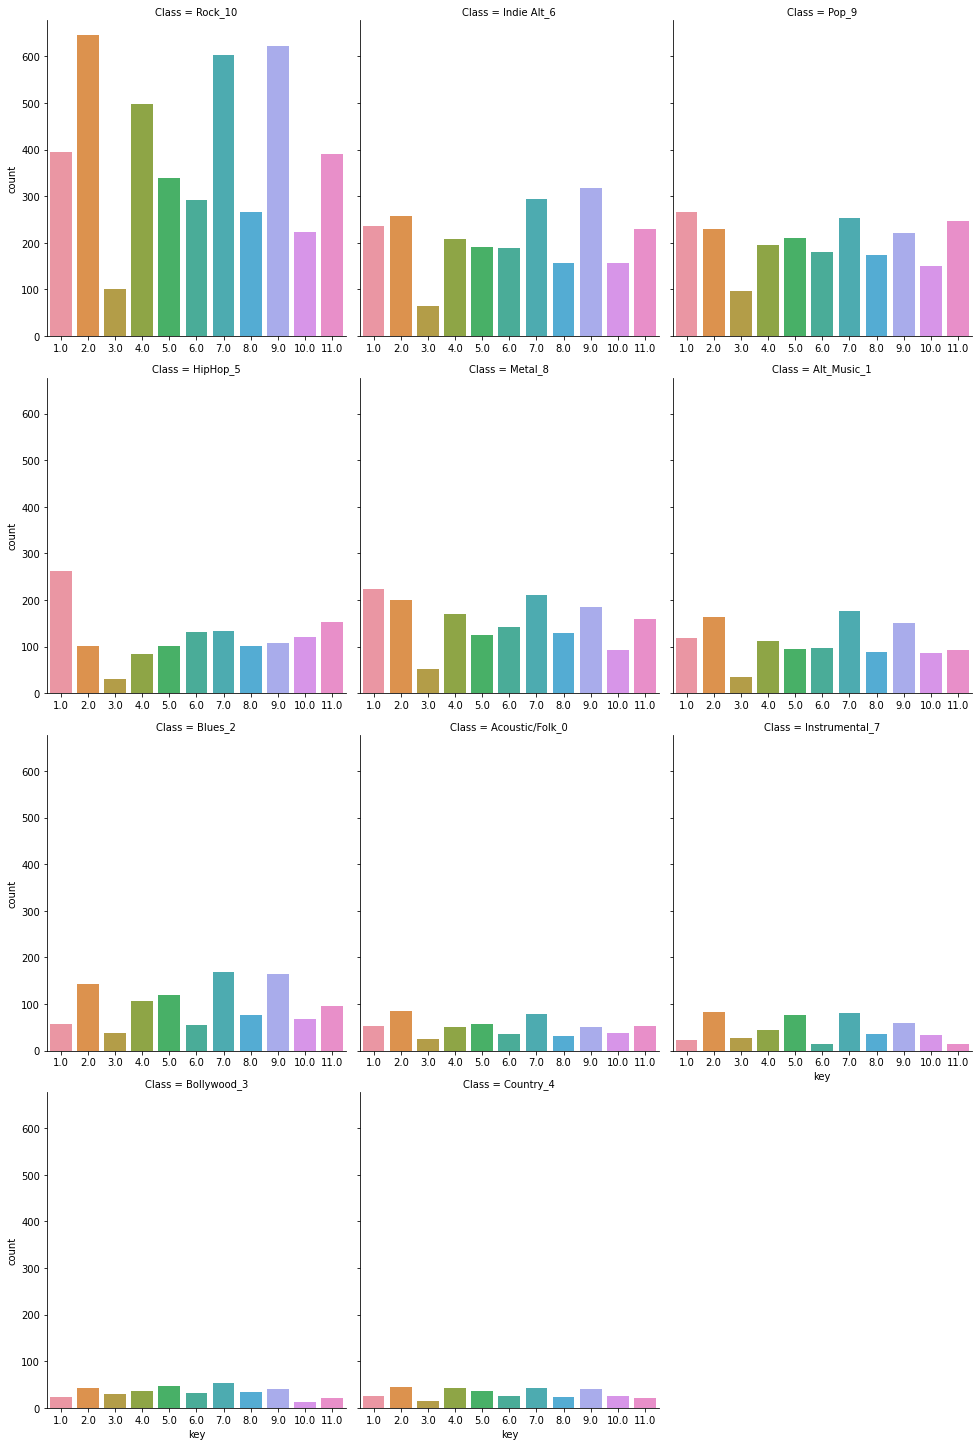

In [ ]:
_=sns.catplot(data=train.groupby(['Class','key'])['key'].agg({'count'}).reset_index().sort_values('count',ascending=False),
            x='key',y='count',col='Class',kind='bar',sharex=False,col_wrap=3,height=5,aspect=.9)

In [ ]:
train.groupby(['Class','key'])['key'].agg({'count'}).reset_index().sort_values('count',ascending=False).pivot_table(index='key',columns='Class',values='count')

Class,Acoustic/Folk_0,Alt_Music_1,Blues_2,Bollywood_3,Country_4,HipHop_5,Indie Alt_6,Instrumental_7,Metal_8,Pop_9,Rock_10
key,,,,,,,,,,,
1.0,52,118,57,24,25,262,235,22,224,266,395
2.0,85,163,143,42,45,102,258,82,200,229,645
3.0,24,35,37,30,15,30,64,26,51,96,101
4.0,51,113,106,35,43,84,209,45,169,196,498
5.0,57,94,119,47,37,101,190,77,126,210,339
6.0,35,96,54,32,26,131,189,13,143,180,291
7.0,79,177,168,54,43,134,294,80,211,253,604
8.0,31,89,76,34,23,102,157,36,130,174,267
9.0,51,151,164,40,41,108,317,60,186,221,622


#### The above facet bar chart explains that the Rock, Indie Art, Pop genre songs consist of all the pitch class notation keys.

#### Pitch class 3 is the least used key in all the genres of songs.

### Let's see loudness feature distribution.Loudness measures the overall decibel level of a song.

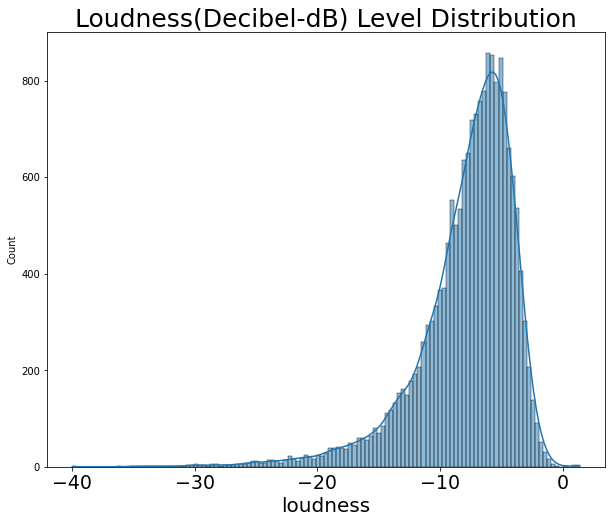

In [ ]:
hist_plot(train,'loudness',title='Loudness(Decibel-dB) Level Distribution')

In [ ]:
train['loudness'].describe()

count    17996.000000
mean        -7.910660
std          4.049151
min        -39.952000
25%         -9.538000
50%         -7.016000
75%         -5.189000
max          1.355000
Name: loudness, dtype: float64

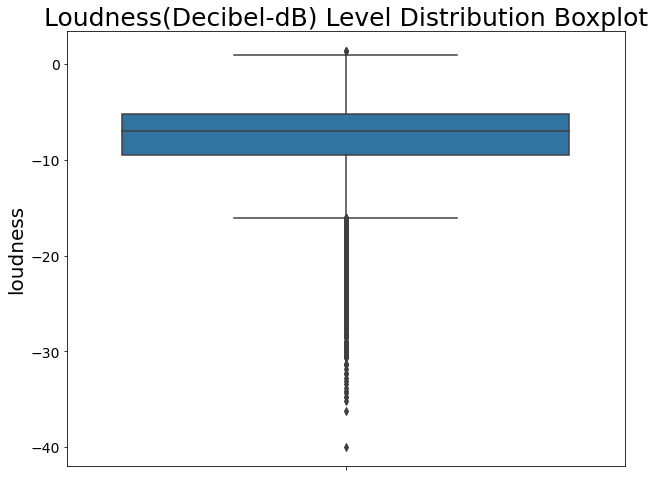

In [ ]:
box_plot(train,'loudness',title='Loudness(Decibel-dB) Level Distribution Boxplot')

#### The above histogram shows that the loudness feature is normally distributed.

#### The average loudness(dB) value is -7.9 dB.

#### The boxplot explains that there are outliers above the third quartile and below the first quartile.

#### Let's genre-wise loudness(dB) level distribution.

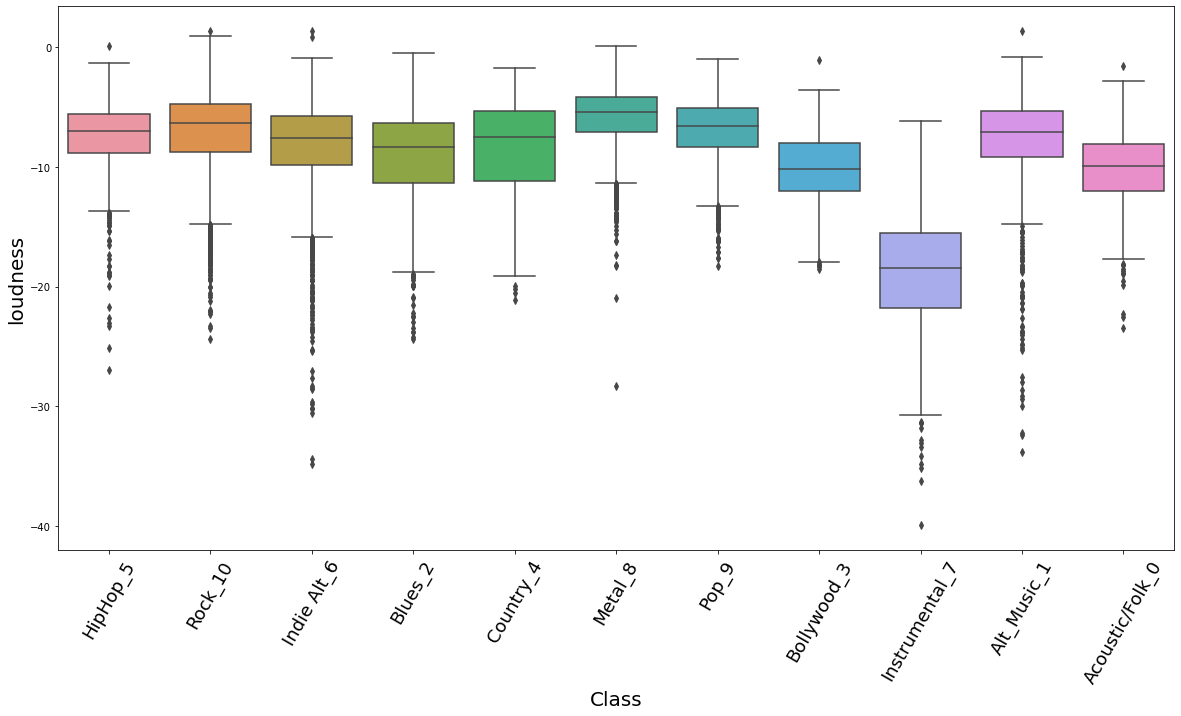

In [ ]:
genre_wise_box(train,'Class','loudness')

In [ ]:
group_summary(train,'Class','loudness')

,Class,count,mean,std,min,25%,50%,75%,max
8,Metal_8,1854.0,-5.892958,2.567727,-28.353,-7.04300,-5.4040,-4.16325,0.101
9,Pop_9,2524.0,-6.913168,2.570898,-18.256,-8.33725,-6.5625,-5.04750,-0.965
10,Rock_10,4949.0,-7.075504,3.279335,-24.361,-8.76500,-6.3430,-4.73400,1.355
5,HipHop_5,1447.0,-7.469736,2.849519,-26.964,-8.87300,-7.0200,-5.61000,0.119
1,Alt_Music_1,1373.0,-7.781162,3.964888,-33.838,-9.14900,-7.0790,-5.33000,1.342
6,Indie Alt_6,2587.0,-8.249528,3.863732,-34.825,-9.80150,-7.5810,-5.73150,1.342
4,Country_4,387.0,-8.486959,3.899885,-21.114,-11.16950,-7.4980,-5.30300,-1.772
2,Blues_2,1272.0,-9.055176,3.860288,-24.372,-11.34450,-8.3065,-6.29325,-0.489
3,Bollywood_3,402.0,-10.213672,3.122697,-18.551,-11.97925,-10.2015,-7.99850,-1.036
0,Acoustic/Folk_0,625.0,-10.240144,3.199228,-23.455,-12.01600,-9.9410,-8.06900,-1.541


#### The above bar chart explains that the Metal, Pop, Rock genre songs have the highest decibel.

#### Instrumental genre songs have the lowest decibels.

#### Let's see mode feature distribution.Mode indicates tonality of the song and used to measure the melodic content.

#### There are two types in mode.Major mode - 1,Minor mode - 0.

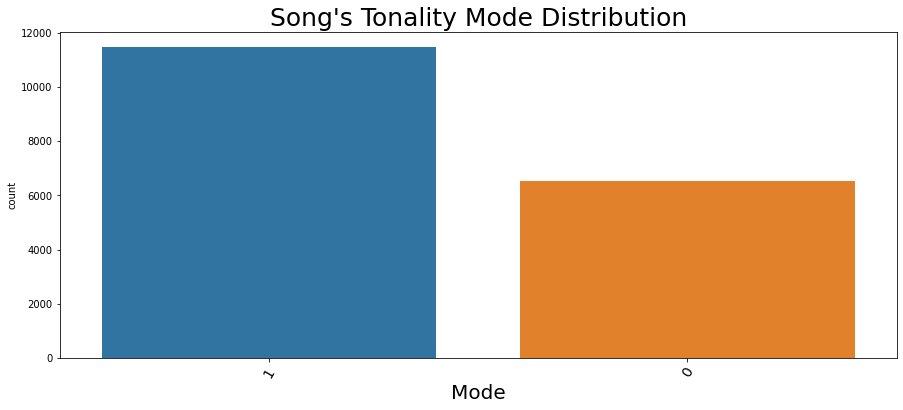

In [ ]:
plt.figure(figsize=(15,6))
_=sns.countplot(train['mode'],order=train['mode'].value_counts().index)
_=plt.title("Song's Tonality Mode Distribution",fontsize=25)
_=plt.xlabel('Mode',fontsize=20)
_=plt.xticks(fontsize=14, rotation=60)

#### The above bar chart explains that the major mode is widely used in songs.

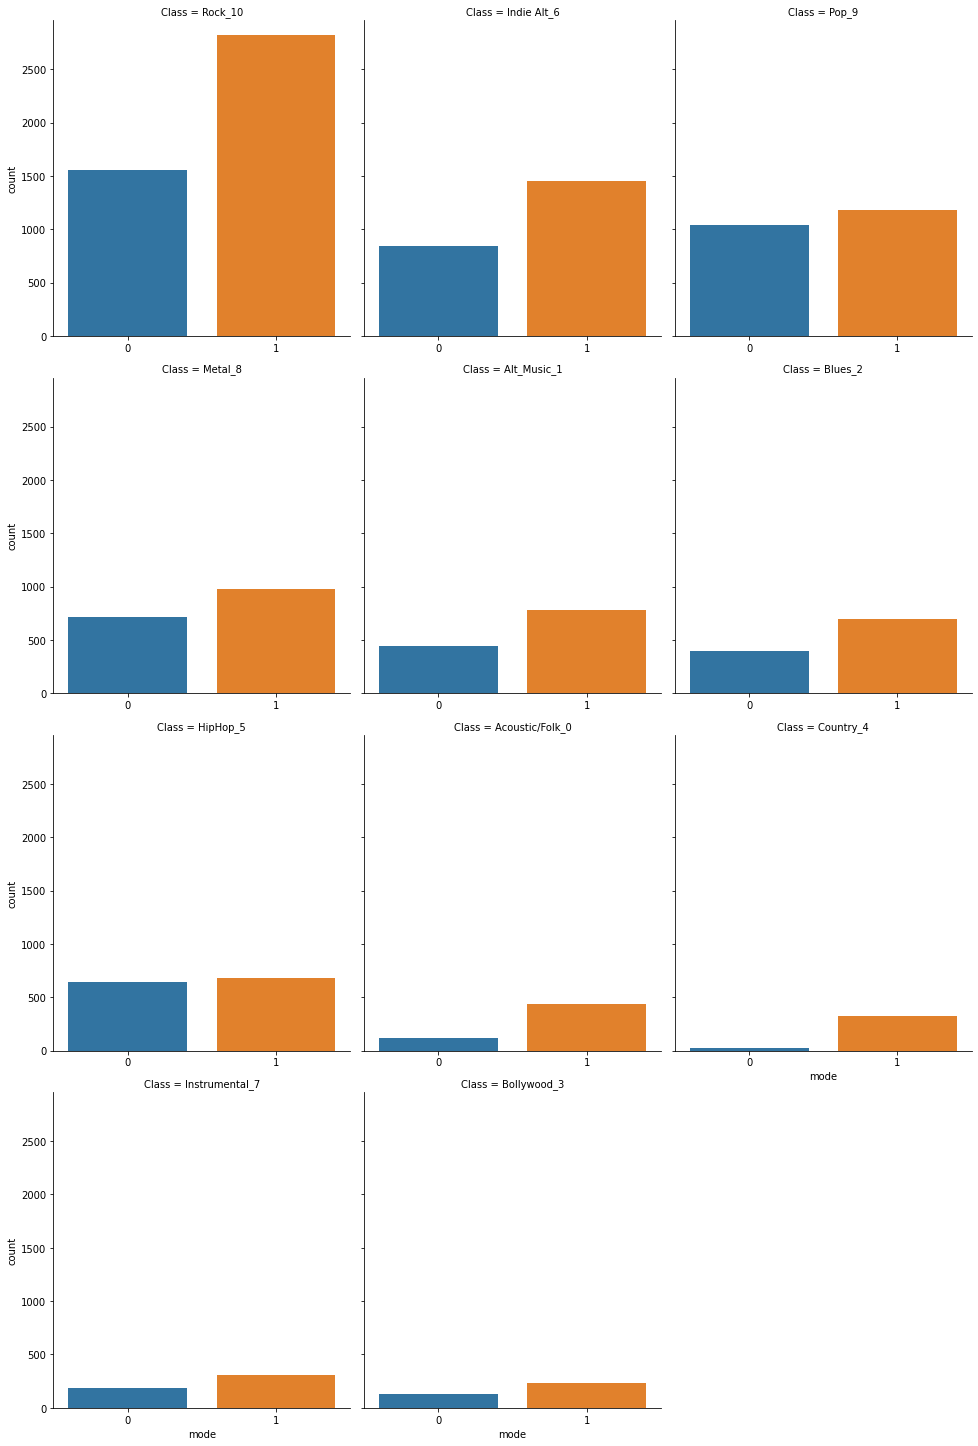

In [ ]:
_=sns.catplot(data=train.groupby(['Class','mode'])['key'].agg({'count'}).reset_index().sort_values('count',ascending=False),
            x='mode',y='count',col='Class',kind='bar',sharex=False,col_wrap=3,height=5,aspect=.9)

#### The above facet bar chart explains that the HipHop genre songs consist both minor and major modes.

#### Let's see speechiness feature distribution.Speechiness measures the presence of spoken words in song.

#### Speechiness measure ranges from 0 to 1.

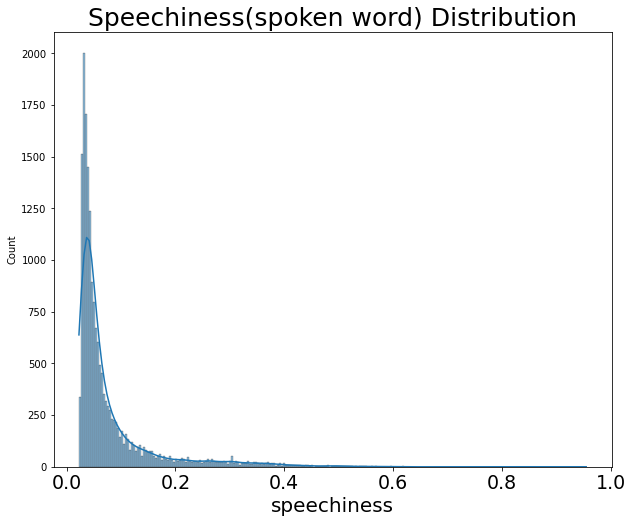

In [ ]:
hist_plot(train,'speechiness',title='Speechiness(spoken word) Distribution')

In [ ]:
train['speechiness'].describe()

count    17996.000000
mean         0.079707
std          0.083576
min          0.022500
25%          0.034800
50%          0.047400
75%          0.083000
max          0.955000
Name: speechiness, dtype: float64

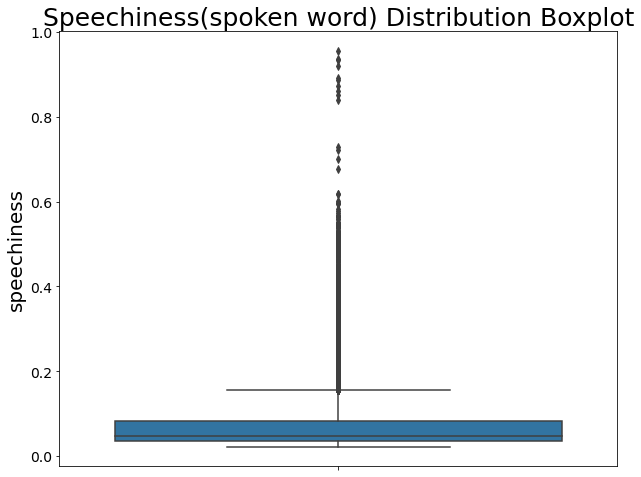

In [ ]:
box_plot(train,'speechiness',title='Speechiness(spoken word) Distribution Boxplot')

#### The above histogram explains that the speechiness feature distribution is right-skewed.

#### The average speechiness value is 0.08.

#### The boxplot explains that there are outliers above the third quartile.

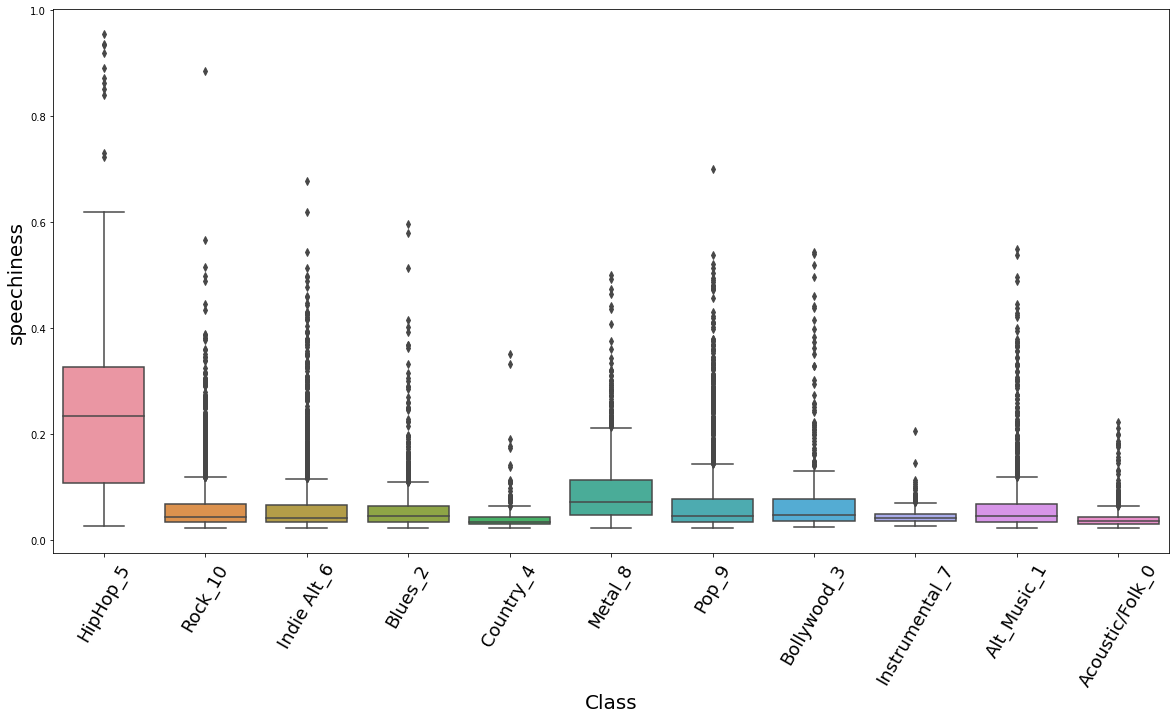

In [ ]:
genre_wise_box(train,'Class','speechiness')

In [ ]:
group_summary(train,'Class','speechiness')

,Class,count,mean,std,min,25%,50%,75%,max
5,HipHop_5,1447.0,0.232698,0.141996,0.0270,0.10700,0.23400,0.326500,0.955
8,Metal_8,1854.0,0.088745,0.059147,0.0234,0.04690,0.07210,0.113000,0.501
3,Bollywood_3,402.0,0.078229,0.084947,0.0241,0.03530,0.04670,0.077175,0.543
9,Pop_9,2524.0,0.073761,0.073715,0.0232,0.03390,0.04530,0.077750,0.701
1,Alt_Music_1,1373.0,0.067848,0.066380,0.0227,0.03410,0.04510,0.068400,0.550
6,Indie Alt_6,2587.0,0.067378,0.068969,0.0232,0.03335,0.04240,0.066500,0.678
2,Blues_2,1272.0,0.061240,0.051984,0.0231,0.03490,0.04505,0.064800,0.597
10,Rock_10,4949.0,0.060726,0.048801,0.0225,0.03340,0.04420,0.067900,0.886
7,Instrumental_7,576.0,0.045550,0.015364,0.0272,0.03600,0.04165,0.050000,0.206
0,Acoustic/Folk_0,625.0,0.043510,0.026740,0.0225,0.03080,0.03550,0.044300,0.223


#### The above box plot explains that the Hip Hop, Metal, Bollywood genres songs have high spoken words in them.

#### Let's see Acousticness feature distribution. The acoustics of a song represents how much instrumental music is used in the song without electronic amplification.

#### Acousticness measure scale from 0 to 1.

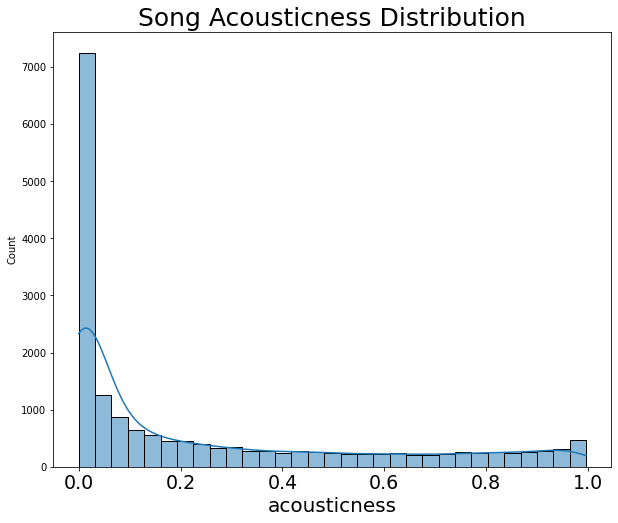

In [ ]:
hist_plot(train,'acousticness',title='Song Acousticness Distribution')

In [ ]:
train['acousticness'].describe()

count    17996.000000
mean         0.247082
std          0.310632
min          0.000000
25%          0.004300
50%          0.081400
75%          0.434000
max          0.996000
Name: acousticness, dtype: float64

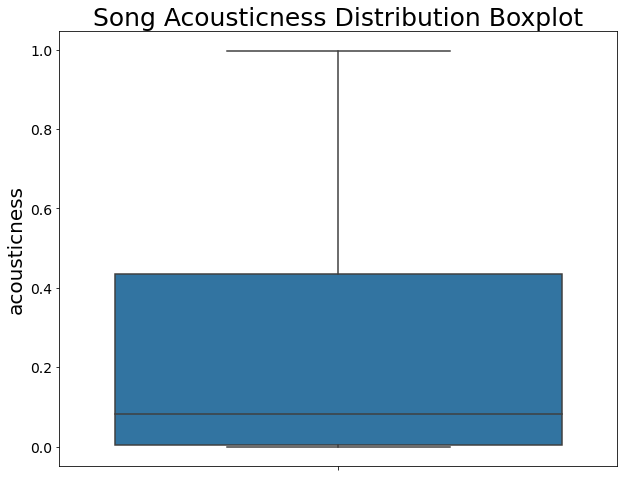

In [ ]:
box_plot(train,'acousticness',title='Song Acousticness Distribution Boxplot')

#### The above histogram explains that the acousticness feature distribution is right skewed.

#### The average acousticness values is 0.25.

#### The boxplot explains that there are no outliers.

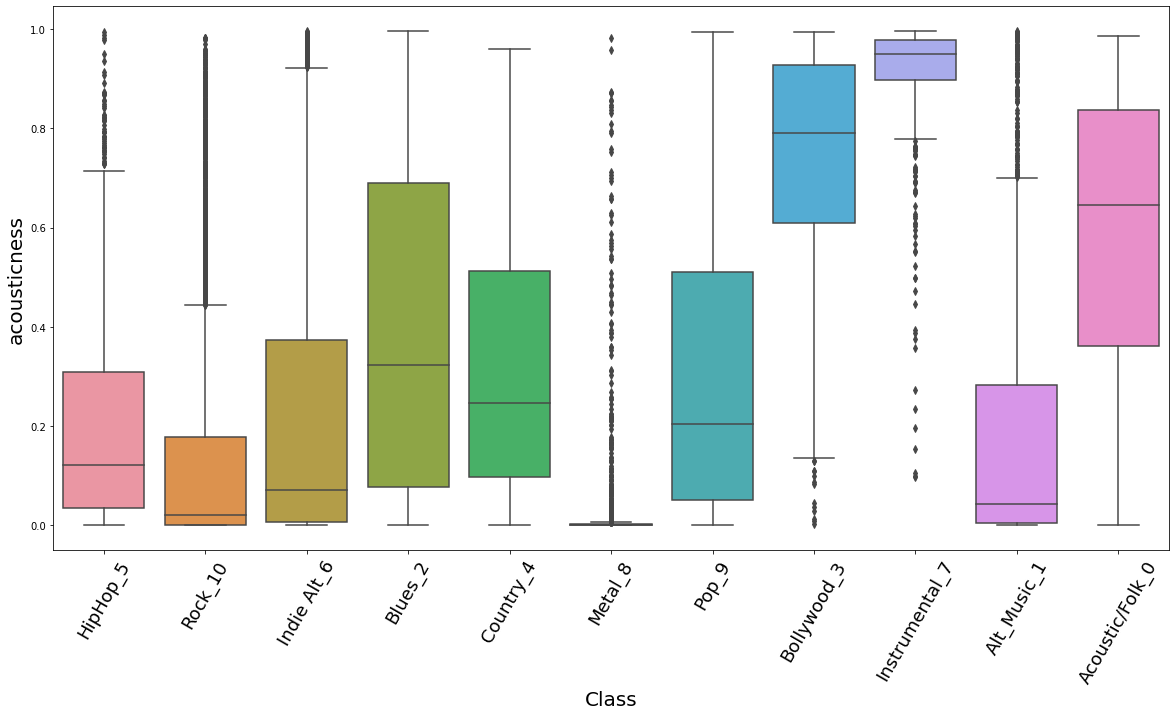

In [ ]:
genre_wise_box(train,'Class','acousticness')

In [ ]:
group_summary(train,'Class','acousticness')

,Class,count,mean,std,min,25%,50%,75%,max
7,Instrumental_7,576.0,0.906322,0.131322,0.098000,0.896750,0.950000,0.97700,0.996
3,Bollywood_3,402.0,0.727855,0.238889,0.001510,0.609000,0.790000,0.92725,0.995
0,Acoustic/Folk_0,625.0,0.579951,0.291408,0.000260,0.361000,0.646000,0.83700,0.986
2,Blues_2,1272.0,0.388652,0.329909,0.000010,0.077175,0.322500,0.68900,0.996
4,Country_4,387.0,0.313100,0.257476,0.000159,0.096400,0.246000,0.51200,0.960
9,Pop_9,2524.0,0.299258,0.285540,0.000014,0.050275,0.204000,0.51025,0.995
6,Indie Alt_6,2587.0,0.228830,0.295972,0.000001,0.006060,0.071000,0.37300,0.996
5,HipHop_5,1447.0,0.202211,0.214283,0.000017,0.035100,0.122000,0.30850,0.995
1,Alt_Music_1,1373.0,0.188958,0.272115,0.000001,0.003490,0.041900,0.28200,0.996
10,Rock_10,4949.0,0.142385,0.231181,0.000001,0.001310,0.019900,0.17800,0.982


#### The above boxplot explains that the Instrumental, Bollywood, Acoustic/Folk genre songs have used more instrument music. 

#### Metal genre songs have used less instrument music.

#### Let's see instrumentalness feature distribution.Instrumentalness predicts whether song contain vocals.

#### High Instrumentalness songs have less vocals.

#### Instrumentalness measure scale from 0 to 1.

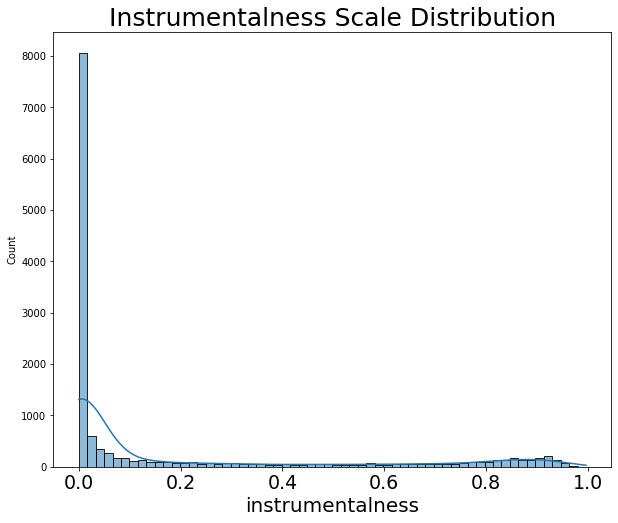

In [ ]:
hist_plot(train,'instrumentalness',title="Instrumentalness Scale Distribution")

In [ ]:
train['instrumentalness'].describe()

count    13619.000000
mean         0.177562
std          0.304048
min          0.000001
25%          0.000089
50%          0.003910
75%          0.200000
max          0.996000
Name: instrumentalness, dtype: float64

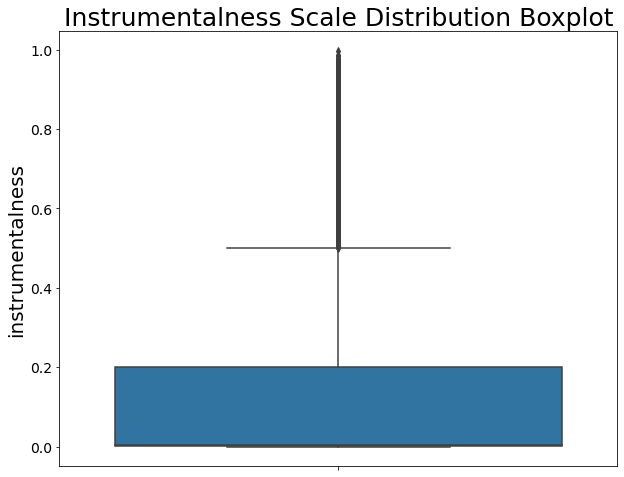

In [ ]:
box_plot(train,'instrumentalness',title="Instrumentalness Scale Distribution Boxplot")

#### The above histogram explains that the instrumentalness feature distribution is right skewed.

#### The average instrumentalness value is 0.18.

#### The above boxplot explains that there are oultliers above the third quartile.

### Let's see genre-wise instrumentalness scale distribution.

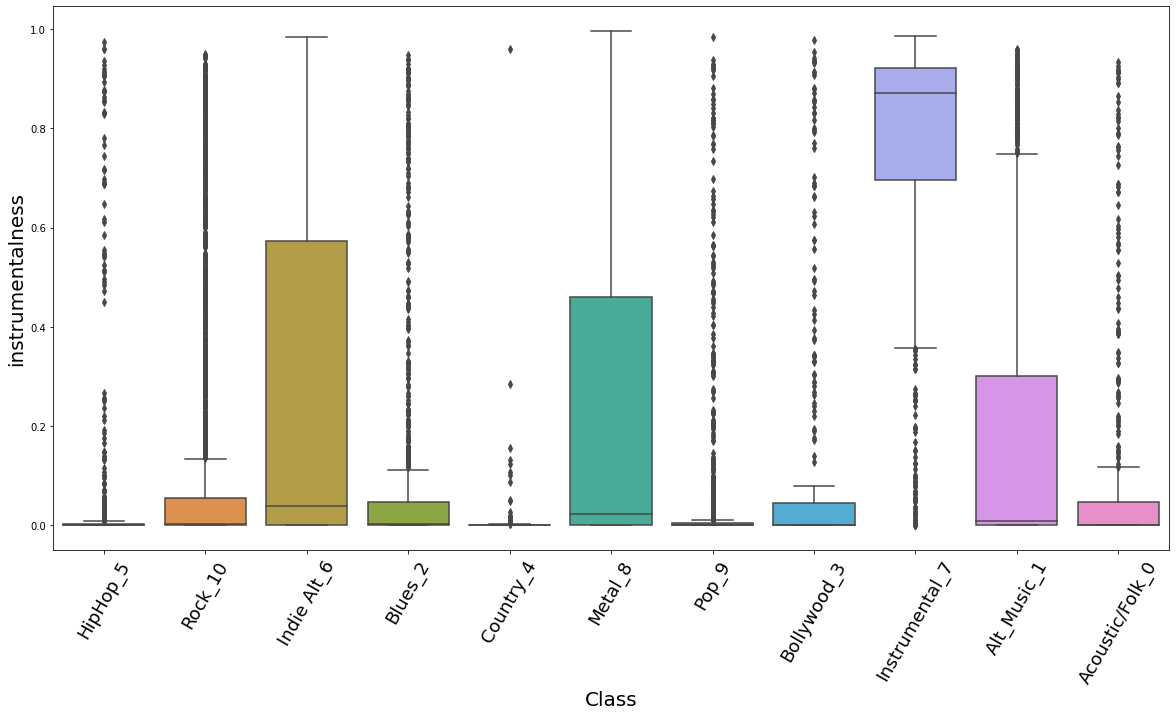

In [ ]:
genre_wise_box(train,'Class','instrumentalness')

In [ ]:
group_summary(train,'Class','instrumentalness')

,Class,count,mean,std,min,25%,50%,75%,max
7,Instrumental_7,575.0,0.740386,0.282754,0.000003,0.695500,0.871000,0.921000,0.987
6,Indie Alt_6,2330.0,0.262643,0.343047,0.000001,0.000553,0.039700,0.572000,0.983
8,Metal_8,1697.0,0.235927,0.328688,0.000001,0.000498,0.023300,0.459000,0.996
1,Alt_Music_1,1198.0,0.199239,0.311538,0.000001,0.000212,0.008830,0.300000,0.959
3,Bollywood_3,305.0,0.131430,0.266466,0.000001,0.000022,0.000741,0.044200,0.977
10,Rock_10,3876.0,0.112833,0.237040,0.000001,0.000064,0.001590,0.053950,0.949
0,Acoustic/Folk_0,487.0,0.099464,0.221808,0.000001,0.000041,0.001030,0.047100,0.933
2,Blues_2,1130.0,0.097938,0.219746,0.000001,0.000135,0.003250,0.046500,0.947
5,HipHop_5,578.0,0.068779,0.205296,0.000001,0.000008,0.000090,0.003202,0.973
9,Pop_9,1263.0,0.049807,0.158479,0.000001,0.000009,0.000132,0.004065,0.985


#### The above boxplot explains that the Instrumental genre songs have high instrumentalness and less vocals.

### Let's see liveness scale distribution. Liveness detects the presence of the audience in a song. Live performed Songs have Higher liveness.

### Liveness measure scale from 0 to 1.

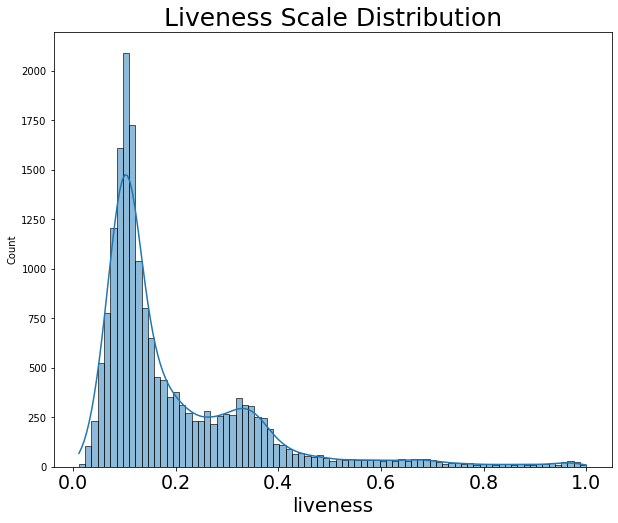

In [ ]:
 hist_plot(train,'liveness',title='Liveness Scale Distribution')

In [ ]:
train['liveness'].describe()

count    17996.000000
mean         0.196170
std          0.159212
min          0.011900
25%          0.097500
50%          0.129000
75%          0.258000
max          1.000000
Name: liveness, dtype: float64

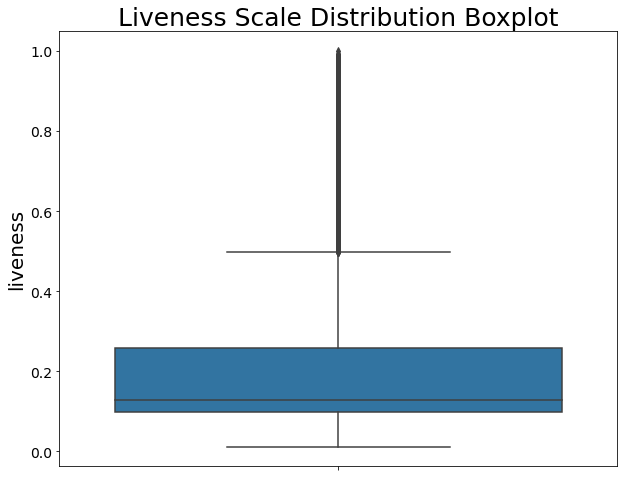

In [ ]:
box_plot(train,'liveness',title='Liveness Scale Distribution Boxplot')

#### The above histogram explains that the livness feature distribution is right skewed.

#### The average liveness value is 0.2.

#### The boxplot explains that there are outliers in the above third quartile.

#### Let's see genre-wise livness scale distribution.

In [ ]:
genre_wise_box(train,'Class','liveness')

In [ ]:
group_summary(train,'Class','liveness')

,Class,count,mean,std,min,25%,50%,75%,max
3,Bollywood_3,402.0,0.236150,0.188892,0.0326,0.104000,0.1575,0.31675,0.935
8,Metal_8,1854.0,0.227966,0.165862,0.0243,0.102000,0.1740,0.32800,0.985
2,Blues_2,1272.0,0.207682,0.182587,0.0233,0.099675,0.1350,0.26600,0.989
10,Rock_10,4949.0,0.207674,0.168812,0.0119,0.095300,0.1390,0.28700,0.992
5,HipHop_5,1447.0,0.195609,0.153078,0.0219,0.099650,0.1340,0.25050,0.951
9,Pop_9,2524.0,0.189270,0.168781,0.0157,0.096475,0.1220,0.22100,1.000
1,Alt_Music_1,1373.0,0.188059,0.137965,0.0136,0.096900,0.1310,0.25900,0.956
6,Indie Alt_6,2587.0,0.182585,0.140687,0.0136,0.096600,0.1220,0.22450,0.952
4,Country_4,387.0,0.166787,0.127359,0.0260,0.097900,0.1210,0.20100,0.967
0,Acoustic/Folk_0,625.0,0.145641,0.103560,0.0370,0.097300,0.1110,0.14100,0.739


#### The above boxplot explains that the Bollywood and Metal genre songs are mostly live performed.

#### Let's see valence scale distribution. Valence measures the positivity of a song. 

#### High valance songs are sound positive(happy).

#### Low valence songs are the sad ones.

#### Valence measure scale from 0 to 1.

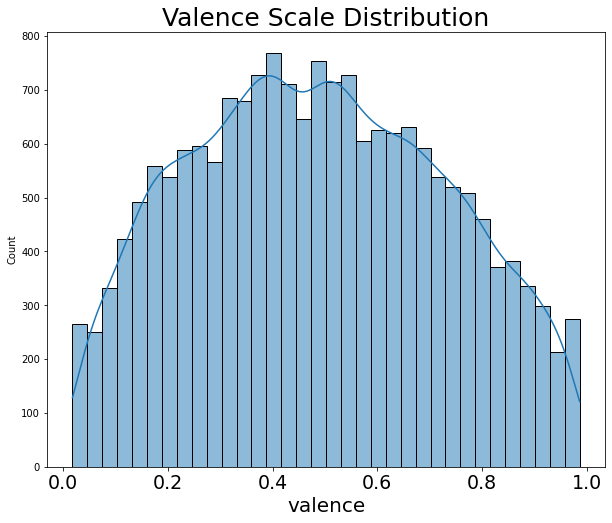

In [ ]:
hist_plot(train,'valence',title="Valence Scale Distribution")

In [ ]:
train['valence'].describe()

count    17996.000000
mean         0.486208
std          0.240195
min          0.018300
25%          0.297000
50%          0.481000
75%          0.672000
max          0.986000
Name: valence, dtype: float64

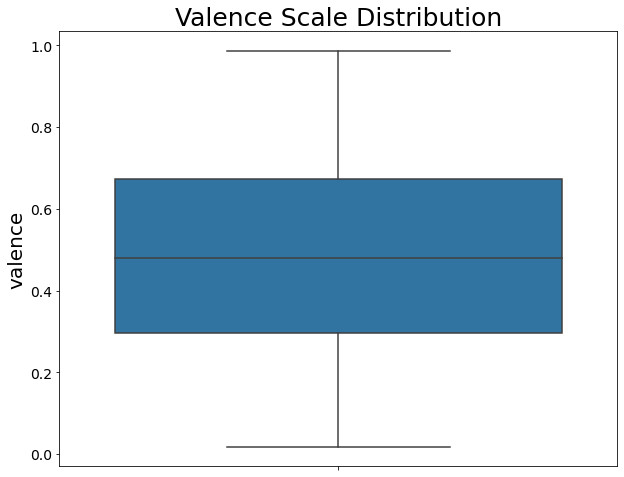

In [ ]:
box_plot(train,'valence',title="Valence Scale Distribution")

#### The above histogram explains that the valence feature is normally distributed.

#### The average valence value is 0.49.

#### The boxplot explains there no outliers.

#### Let's see genre-wise valence scale distribution.

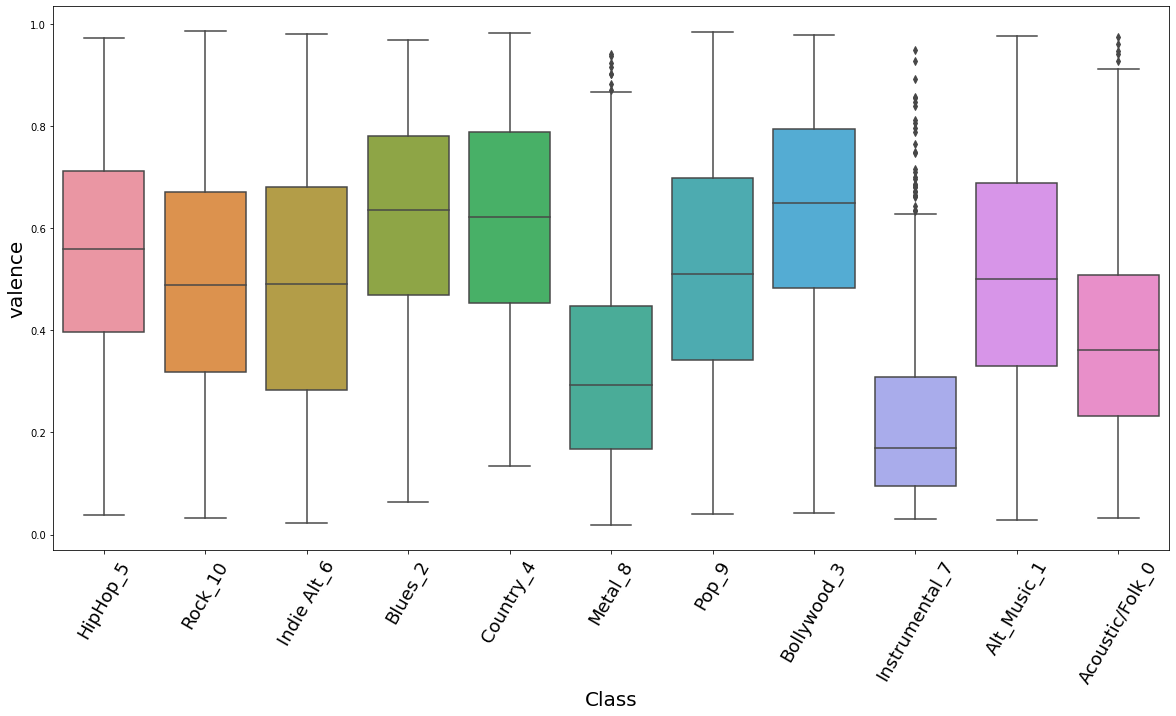

In [ ]:
genre_wise_box(train,'Class','valence')

In [ ]:
group_summary(train,'Class','valence')

,Class,count,mean,std,min,25%,50%,75%,max
3,Bollywood_3,402.0,0.627075,0.215148,0.0428,0.483250,0.6485,0.79350,0.978
4,Country_4,387.0,0.612765,0.217759,0.1340,0.453000,0.6210,0.78750,0.982
2,Blues_2,1272.0,0.612596,0.208033,0.0635,0.468750,0.6360,0.78100,0.969
5,HipHop_5,1447.0,0.545974,0.214893,0.0379,0.397000,0.5600,0.71200,0.973
9,Pop_9,2524.0,0.521299,0.227476,0.0397,0.341000,0.5105,0.69900,0.984
1,Alt_Music_1,1373.0,0.505400,0.237647,0.0284,0.331000,0.5010,0.68900,0.977
10,Rock_10,4949.0,0.496225,0.228024,0.0328,0.319000,0.4880,0.67100,0.986
6,Indie Alt_6,2587.0,0.487472,0.251035,0.0223,0.283500,0.4900,0.68100,0.980
0,Acoustic/Folk_0,625.0,0.382684,0.199169,0.0329,0.232000,0.3610,0.50900,0.974
8,Metal_8,1854.0,0.320031,0.190226,0.0183,0.168250,0.2935,0.44775,0.941


#### The above boxplot explains that the Bollywood and Country, Blues genre songs have high positivity sound.

### Let's see tempo feature distribution. Tempo measures the beat per minute(BPM) of a song.

### A song with a higher tempo is a fast-paced one.

### A song with a slower tempo means slower and has longer beats.

#### Tempo measure scale from 30 to 217.

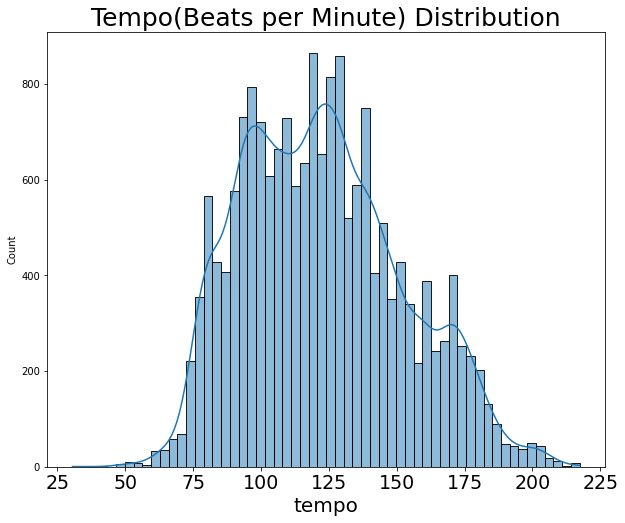

In [ ]:
hist_plot(train,'tempo',title='Tempo(Beats per Minute) Distribution')

In [ ]:
train['tempo'].describe()

count    17996.000000
mean       122.623294
std         29.571527
min         30.557000
25%         99.620750
50%        120.065500
75%        141.969250
max        217.416000
Name: tempo, dtype: float64

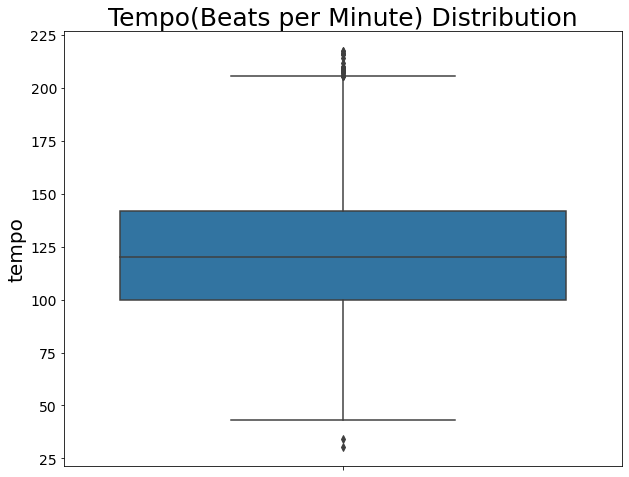

In [ ]:
box_plot(train,'tempo',title='Tempo(Beats per Minute) Distribution')

#### The above histogram explains that the tempo feature is normally distributed.

#### The average tempo of the song is 122.

#### The boxplot explains that there are outliers in the above third quartile and below the first quartile.

###  Let's see genre-wise tempo(beats per minute) distribution.

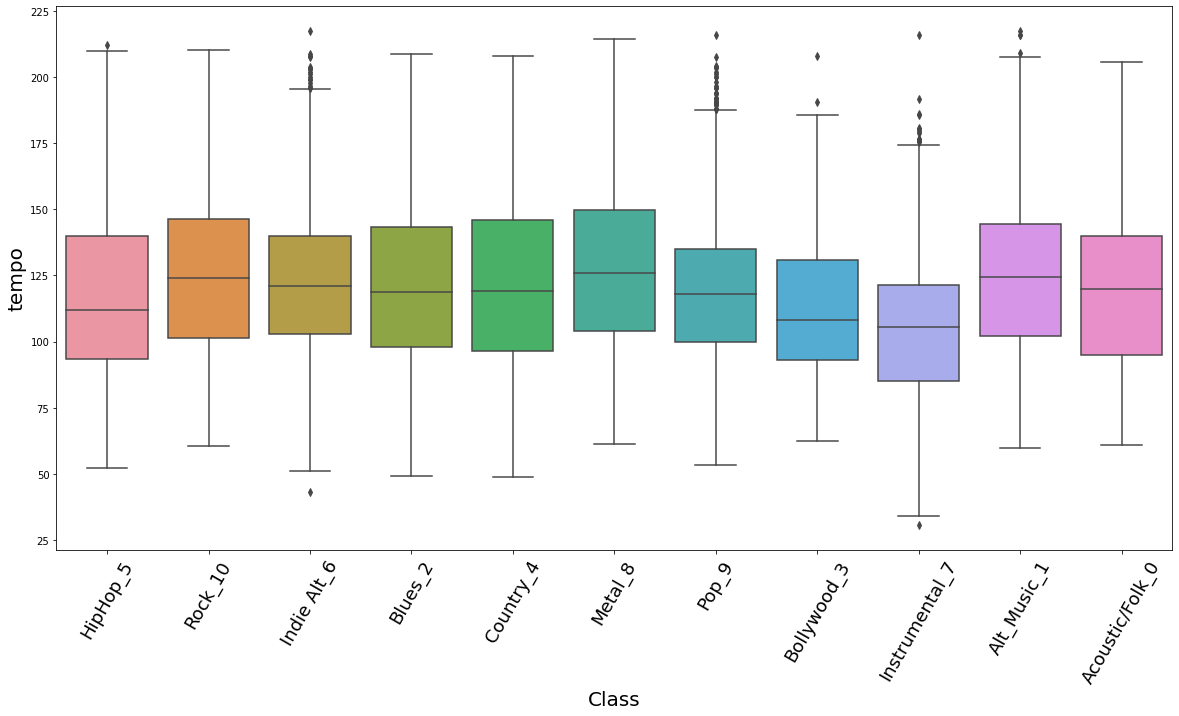

In [ ]:
genre_wise_box(train,'Class','tempo')

In [ ]:
group_summary(train,'Class','tempo')

,Class,count,mean,std,min,25%,50%,75%,max
8,Metal_8,1854.0,128.338720,30.263650,61.207,104.04950,125.9840,149.88100,214.396
10,Rock_10,4949.0,125.569565,29.635744,60.449,101.35900,123.9400,146.28700,210.164
1,Alt_Music_1,1373.0,124.873452,29.042426,59.862,102.09000,124.3700,144.58300,217.416
6,Indie Alt_6,2587.0,123.230027,28.028738,42.956,102.82150,121.1480,140.02400,217.416
4,Country_4,387.0,123.003475,31.739645,48.718,96.50350,119.0750,145.97150,208.067
2,Blues_2,1272.0,122.748731,31.774659,49.320,97.99075,118.7115,143.31300,208.634
0,Acoustic/Folk_0,625.0,120.204082,30.750142,60.983,94.93600,119.9810,140.07500,205.598
9,Pop_9,2524.0,119.132265,26.914289,53.437,99.70025,117.9890,134.85275,216.053
5,HipHop_5,1447.0,117.940362,29.803433,52.145,93.46850,112.1010,140.08500,212.049
3,Bollywood_3,402.0,113.519682,27.554693,62.448,93.00700,108.0820,130.73125,207.806


#### The above boxplot explains that the Bollywood and Instrumental genre songs have low bpm.

#### Let's see song's time duration distribution.

In [ ]:
train['duration_in min/ms'].describe()

count    1.799600e+04
mean     2.007445e+05
std      1.119891e+05
min      5.016500e-01
25%      1.663370e+05
50%      2.091600e+05
75%      2.524900e+05
max      1.477187e+06
Name: duration_in min/ms, dtype: float64

In [ ]:
group_summary(train,'Class','duration_in min/ms')

,Class,count,mean,std,min,25%,50%,75%,max
8,Metal_8,1854.0,270761.782632,88084.752836,85496.000000,215163.000000,252382.000000,304369.750000,9.435290e+05
2,Blues_2,1272.0,247517.368711,92042.138623,66884.000000,186946.750000,226793.000000,279195.250000,9.225060e+05
10,Rock_10,4949.0,233135.743977,102218.616891,1.828450,188853.000000,222427.000000,265556.000000,1.477187e+06
6,Indie Alt_6,2587.0,229285.001546,79432.278605,40640.000000,186332.000000,216467.000000,254949.500000,1.284507e+06
1,Alt_Music_1,1373.0,225403.860160,62704.871088,63214.000000,186067.000000,214960.000000,253840.000000,6.450000e+05
5,HipHop_5,1447.0,207435.806496,64332.602567,55775.000000,164744.000000,197760.000000,239293.500000,8.110770e+05
9,Pop_9,2524.0,173996.187544,86957.011181,0.969150,159148.250000,194986.500000,222001.250000,8.110770e+05
3,Bollywood_3,402.0,4.971157,2.739840,0.501650,3.551946,4.581392,5.770887,2.988600e+01
0,Acoustic/Folk_0,625.0,4.121132,1.526820,1.027483,3.346667,3.822583,4.536233,2.329155e+01
7,Instrumental_7,576.0,4.117292,1.683754,0.987117,2.877575,3.738908,5.039000,1.674378e+01


#### The song duration represented in both milliseconds and minutes.So, Let's filter the song duration less 60000 milliseconds and select the largest 20.

In [ ]:
train[(train['duration_in min/ms']<60000)]['duration_in min/ms'].nlargest(20)

1301     57443.000000
4304     57391.000000
1069     56000.000000
12376    55775.000000
13913    40640.000000
11544    23320.000000
14934       29.886000
1219        29.450000
14265       23.291550
6121        21.592667
17440       20.424217
10830       18.709783
11490       16.743783
8189        13.023283
1766        12.563333
14711       11.907550
11522       11.803667
1211        11.612450
10006       11.200000
4700        10.942667
Name: duration_in min/ms, dtype: float64

#### From based on the above results convert the durations to minutes that are greater 30.

#### Let's create a function to convert milliseconds to minutes.

In [14]:
def ms_to_min(col):
  if col>30:
    return round(col/60000,2)
  else:
    return round(col,2)


In [ ]:
train['duration_in min/ms']=train['duration_in min/ms'].apply(ms_to_min)

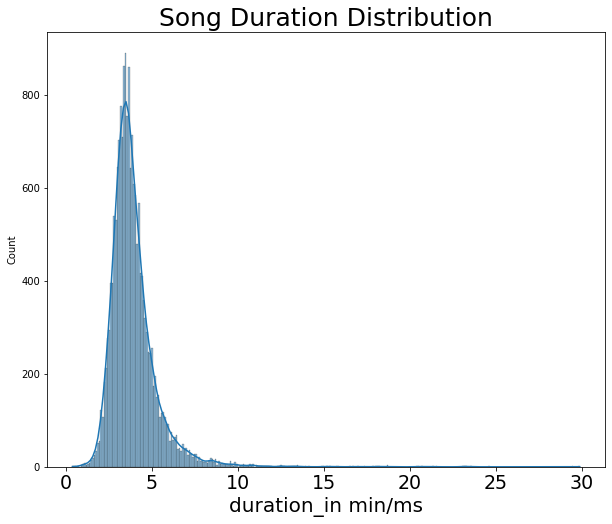

In [ ]:
hist_plot(train,'duration_in min/ms',title="Song Duration Distribution")

In [ ]:
train['duration_in min/ms'].describe()

count    17996.000000
mean         3.930393
std          1.427916
min          0.390000
25%          3.130000
50%          3.670000
75%          4.380000
max         29.890000
Name: duration_in min/ms, dtype: float64

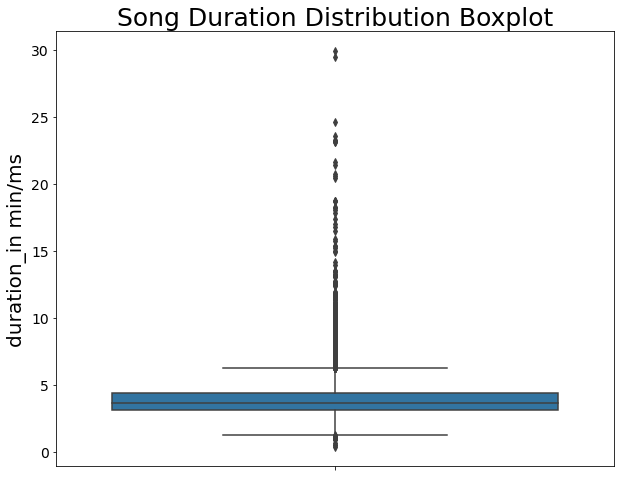

In [ ]:
box_plot(train,'duration_in min/ms',title="Song Duration Distribution Boxplot")

#### The above histogram explains that the song duration feature is normally distributed.

#### The average song duration is 3.93  minutes.

##### The above boxplot explains that there are outliers above the third quartile and below the first quartile.

#### Let's see genre-wise song duration distribution.

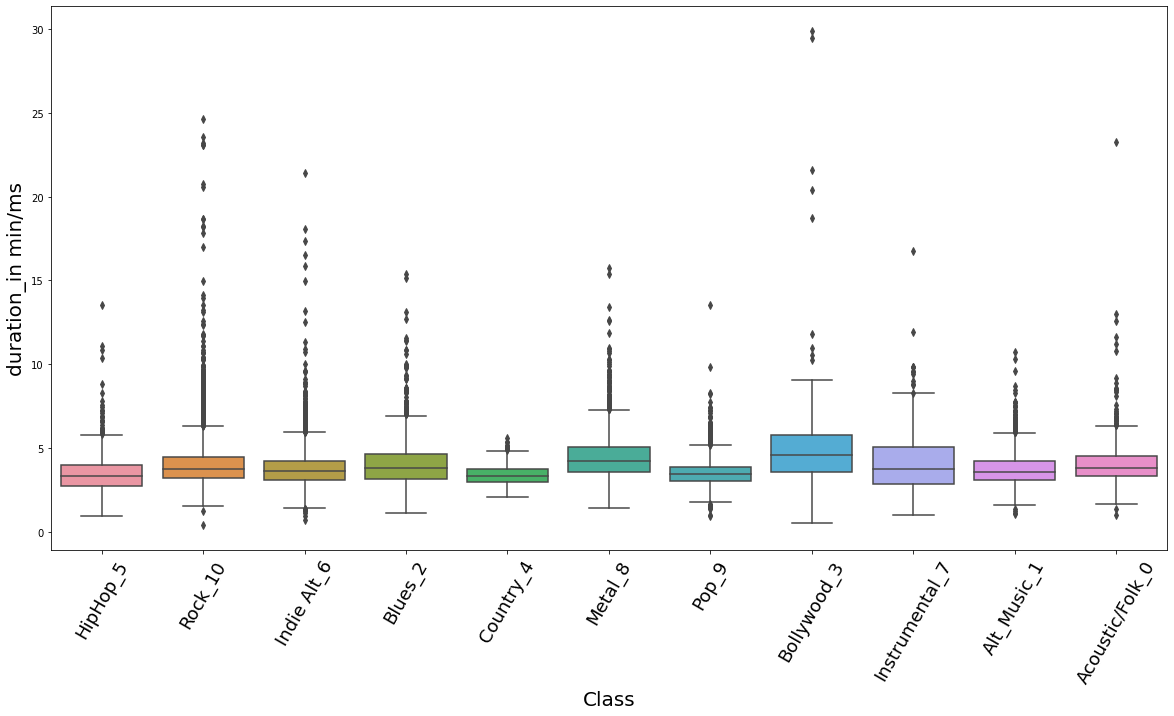

In [ ]:
genre_wise_box(train,'Class','duration_in min/ms')

In [ ]:
group_summary(train,'Class','duration_in min/ms')

,Class,count,mean,std,min,25%,50%,75%,max
3,Bollywood_3,402.0,4.971070,2.739809,0.50,3.5525,4.58,5.7700,29.89
8,Metal_8,1854.0,4.512621,1.468121,1.42,3.5900,4.21,5.0700,15.73
2,Blues_2,1272.0,4.125228,1.534013,1.11,3.1200,3.78,4.6525,15.38
0,Acoustic/Folk_0,625.0,4.121328,1.526683,1.03,3.3500,3.82,4.5400,23.29
7,Instrumental_7,576.0,4.117448,1.683966,0.99,2.8775,3.74,5.0400,16.74
10,Rock_10,4949.0,4.039929,1.552870,0.39,3.2100,3.75,4.4600,24.62
6,Indie Alt_6,2587.0,3.821473,1.323895,0.68,3.1050,3.61,4.2500,21.41
1,Alt_Music_1,1373.0,3.756752,1.045029,1.05,3.1000,3.58,4.2300,10.75
9,Pop_9,2524.0,3.493982,0.806223,0.97,3.0100,3.42,3.8800,13.52
5,HipHop_5,1447.0,3.457319,1.072153,0.93,2.7500,3.30,3.9850,13.52


#### The above boxplot explains that the Bollywood genre songs are lengthy.

### Let's see time signature distribution. The time signature is a musical notation to specify how many beats are contained in each measure.

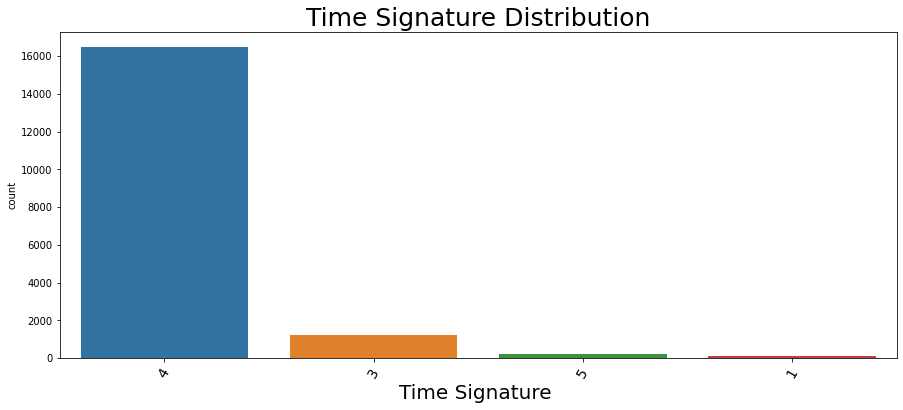

In [ ]:
plt.figure(figsize=(15,6))
_=sns.countplot(train['time_signature'],order=train['time_signature'].value_counts().index)
_=plt.title("Time Signature Distribution",fontsize=25)
_=plt.xlabel('Time Signature ',fontsize=20)
_=plt.xticks(fontsize=14, rotation=60)


In [ ]:
train['time_signature'].value_counts()

4    16451
3     1228
5      203
1      114
Name: time_signature, dtype: int64

#### The above bar chart explains that most songs have 4 note.

### Let's see genre-wise time signature distribution.

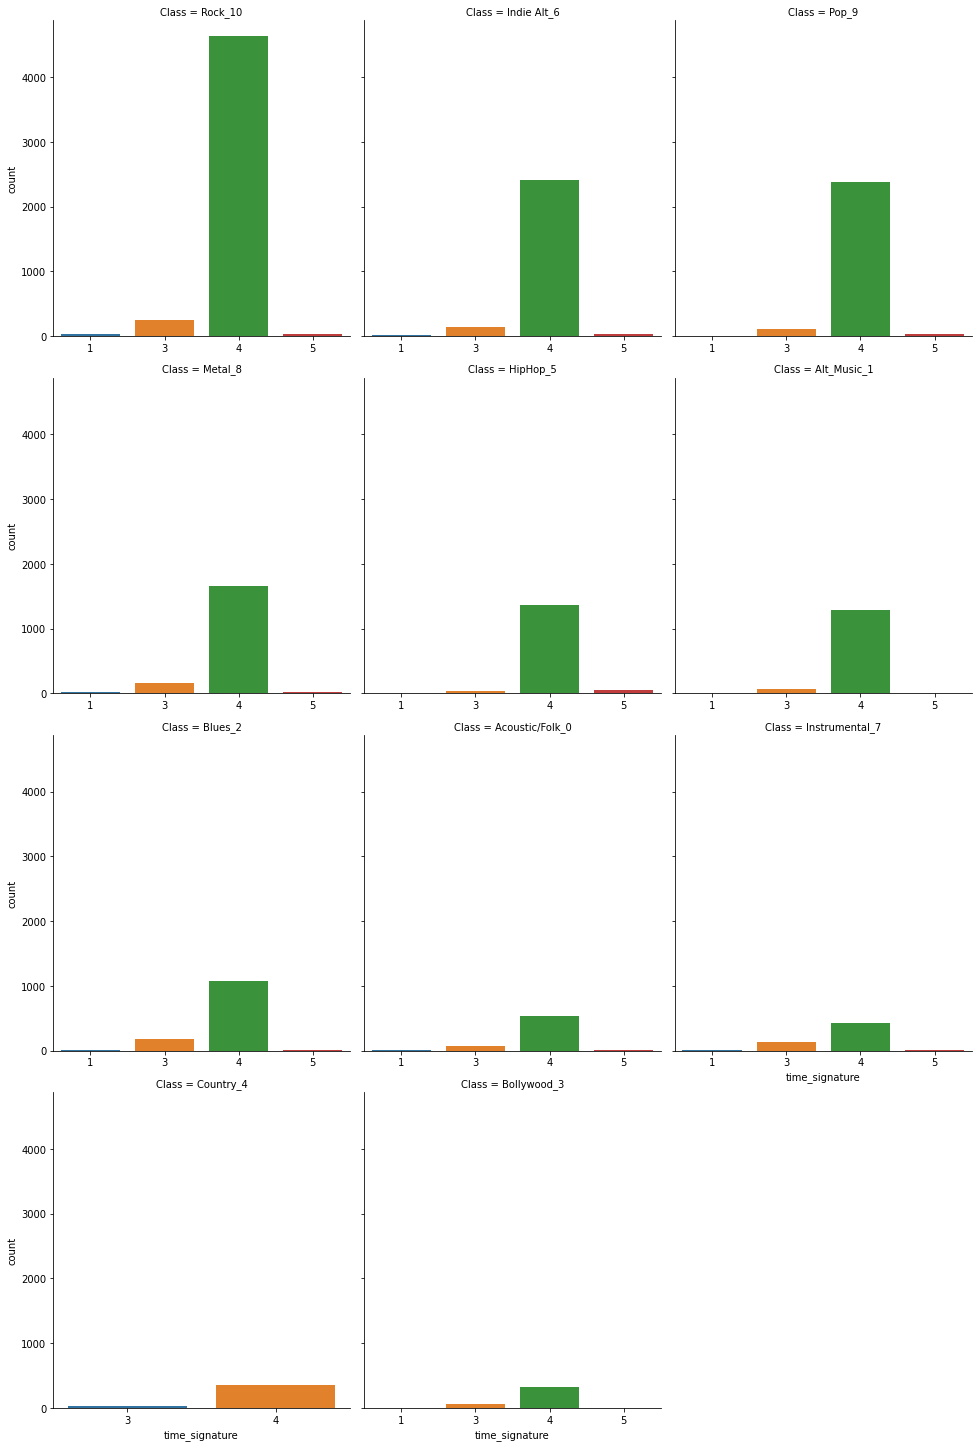

In [ ]:
_=sns.catplot(data=train.groupby(['Class','time_signature'])['time_signature'].agg({'count'}).reset_index().sort_values('count',ascending=False),
            x='time_signature',y='count',col='Class',kind='bar',sharex=False,col_wrap=3,height=5,aspect=.9)

#### The above bar chart explains that other than country genre all other genre songs are used 1,3,4,5 music note. 

#### Let's see the correlation between the continuous variables by using heat map.

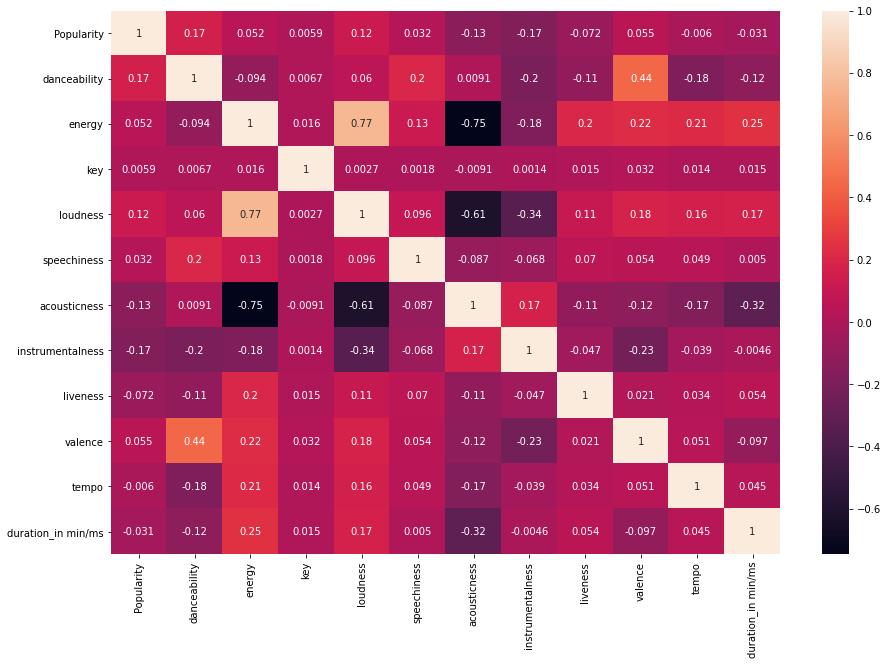

In [20]:
_=plt.figure(figsize=(15,10))
_=sns.heatmap(train.iloc[:,np.r_[2:7,8:15]].corr(),annot=True)

#### The above heat map explains that the feature energy and loudness are highly positively correlated.

#### Features acousticness and energy are highly negatively correlated.

#### Features acousticness and loudness are highly negatively correlated.
